## Analysis of simulation data

### This notebooks contains scripts:
1. to read and pickle the rheology data, F_rig and z_net
2. load the pickle file
3. make plots using the bidi function

In [2]:
# importing libraries

import os
import matplotlib
import math
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='mkl')

In [24]:
# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  8,
  "ytick.labelsize":  8,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

In [22]:
'''
script to read and pickle data.
Here we read, concatenate and pickle the simulation data from data_*.dat file, F_rig and z_net

'''

# Reading directory:

TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)
#TopDir      = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/"
#TopDir      = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/"

#pkldumpdir  ="/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/" #home linux
pkldumpdir  ="/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/"
#pkldumpdir  ="/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/" #office linux

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

data_file = 'data_file_4.pkl'

if os.path.exists(pkldumpdir+data_file):
    with open(pkldumpdir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    print(f"\nData loaded from existing '{data_file}' pickle file")

else:
    # files to read
    file_names = ['data_random_seed_params_stress100r_shear.dat','F_rig.txt','Z_Znet.txt']
    sum_variables = ['datasum', 'frigsum', 'znetsum']

    # initializing the dictionary
    datasets=[]                    
    datasets_dict = {key: None for key in datasets}
    
    for i in range(len(NP)):
        for j in range(len(phi)):
            # redefining phi
            phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
            for k in range(len(ar)):
                dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
                if os.path.exists(dataname):
                    temp=[]
                    for l in range (run[NP[i]]):
                        for m, file_name in enumerate(file_names):
                            sum_variables[m]=0
                            with open(f'{dataname}/run_{l+1}/{file_name}', 'r') as file:
                                sum_variables[m] = np.loadtxt(file)
                                
                        sum_variables[1]=np.expand_dims(sum_variables[1], axis=1)       
                        dat_run=np.concatenate(sum_variables,axis=1)
                        temp.append(dat_run)
                    datasets_dict['NP_'+str(NP[i])+'_phi_'+phir+'_ar_'+str(ar[k])]=temp

                #else:
                    #print(f'Path does not exist-{dataname}')
                    
                # modifying Frig value to make it frig
                for l in range (run[NP[i]]):
                    datakey = 'NP_'+str(NP[i])+'_phi_'+phir+'_ar_'+str(ar[k])
                    if datakey in datasets_dict:
                        temp2 = datasets_dict[datakey][l][:,30]/NP[i]
                        datasets_dict[datakey][l][:,30] = temp2
                    
    with open(pkldumpdir+data_file, 'wb') as file:
        pickle.dump(datasets_dict, file)
    with open(pkldumpdir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    
    print("\nData read and loaded \n")
    
    
m='''
Data structure - 
datasets_dict contains the data of all parameters and all samples

datasets_dict: {'key1':[run1, run2, run3, run4], 'key2': [run1, run2, run3, run4],.....}

eg: 'key1': 'NP_1000_phi_0.70_ar_1.0'
    run1.shape = (5001 (samples),35 (parameters))

'''


Data loaded from existing 'data_file_4.pkl' pickle file


In [23]:
(datasets_dict['NP_1000_phi_0.76_ar_1.4'][1]).shape

(2001, 35)

#### New dictionary (steady state)

In [24]:
# Creating a new dictionary with steady state points - with mean and std dev in a  dictionary
# The following dictionaries contain mean values of parameters of all runs

off=100 # removing 1 strain unit (unsteady part)
datasets=[]                    
datapoint_dict = {key: None for key in datasets}
std_dev_dict = {key: None for key in datasets}

for key in datasets_dict:
    mean_lists = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    var_lists = [np.var(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    
    mean_varray = np.vstack(mean_lists)
    std_varray = np.vstack(var_lists)
    
    datapoint_dict[key] = np.mean(mean_varray, axis=0) # dicts used in fuction below
    std_dev_dict[key] = np.sqrt(np.mean(std_varray, axis=0))

In [8]:
datapoint_dict['NP_1000_phi_0.74_ar_1.0'].shape

(35,)

In [22]:
len(datasets_dict['NP_1000_phi_0.75_ar_1.4'][1][100:,0])

1901

In [20]:
datapoint_dict['NP_1000_phi_0.75_ar_1.4']

array([ 9.41807738e+01,  1.05000000e+01,  1.18959026e-01,  9.23672369e+02,
        9.10937062e+02,  1.80253139e+00,  7.10619953e+00,  3.82657263e+00,
        2.60011965e+02,  2.56870400e+02,  3.12393276e+01, -2.45242390e+03,
        6.60357233e+01, -2.11882724e-03,  9.43616132e-04,  2.43225934e+00,
        2.43225934e+00,  0.00000000e+00,  2.30840295e+03,  3.38900507e+00,
        6.39818553e+00,  2.31089017e-05,  1.00000000e+05,  1.00000000e+05,
        0.00000000e+00,  1.05000000e+01,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+02,  0.00000000e+00,  1.19134534e-01,  2.43225934e+00,
        1.19303503e+00,  2.76796879e+00,  8.31656861e-01])

### Pickle files details

<style>
table {
    font-size: 20px;
}
</style>

| pkl file         |       phi         |  <center>        ar    </center>        |
|------------------|-------------------|-----------------------------------------|
| data_file_1.pkl  |    0.70 - 0.76    | <center>1.0, 1.4, 1.8, 2.0, 4.0</center>|
|                  |    0.77 - 0.79    | <center>4.0</center>                    |  
| data_file_2.pkl  |    0.77           | <center>2.0</center>                    |
|                  |    0.792          | <center>4.0</center>                    |
| data_file_3.pkl  |    0.70 - 0.76    | <center>1.0, 1.4, 1.8, 2.0, 4.0</center>|
|                  |    0.77           | <center>2.0, 4.0</center>               |
|                  | 0.78, 0.79, 0.792 | <center>4.0</center>                    |
| data_file_4.pkl  |    0.70 - 0.76    | <center>1.0, 1.4, 1.8, 2.0, 4.0</center>|
|                  |    0.77 - 0.792   | <center>4.0</center>                    |


1. Table above shows the details of the simulation data stored in a particular pickle file.
2. data_file_4 - \phi = 0.77 and \ar = 2.0 jams hence deleted from data_file_3

# Mearge and load Pickle files 

##### Only run the below two cells for mearging pickle files

In [ ]:
## To mearge two pickle files into one
# each pickle file is just has one dictionary with key as the case condition

pkldumpdir  ="/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/"

def merge_pkls(*pkls):
    """
    Merge any number of pickle dictionaries into one.
    Args:
        *pkls: Any number of pickle dictionaries to be merged.
    Returns:
        dict: The merged dictionary.
    """
    merged_dict = {}
    for pickle in pkls:
        with open(pkldumpdir+pickle, 'rb') as file:
            datasets_dict = pickle.load(file)
            merged_dict.update(datasets_dict)
    return merged_dict

In [ ]:
# mearging pickle datasets

data_file = data_file_3.pkl # name of new pickle file

merged_dict = merge_pkls(data_file_1.pkl, data_file_2.pkl)
if not os.path.exists(pkldumpdir+data_file):
    with open(pkldumpdir+data_file, 'wb') as file:
        pickle.dump(merged_dict, file)
    with open(pkldumpdir+data_file, 'rb') as file:
        datasets_dict = pickle.load(file)
    
    print("\n Pickle data mearged, new pickle dumped and loaded \n")
    
print("\n Pickle file with same name already exists \n")

### Investigating dt

In [7]:
mean_diff = lambda values: sum(values[i + 1] - values[i] for i in range(len(values) - 1)) / (len(values) - 1) if len(values) > 1 else 0

In [46]:
# average dt for a particular set
mean_diff(datasets_dict['NP_1000_phi_0.76_ar_4.0'][1][100:,0])

0.03938188421052632

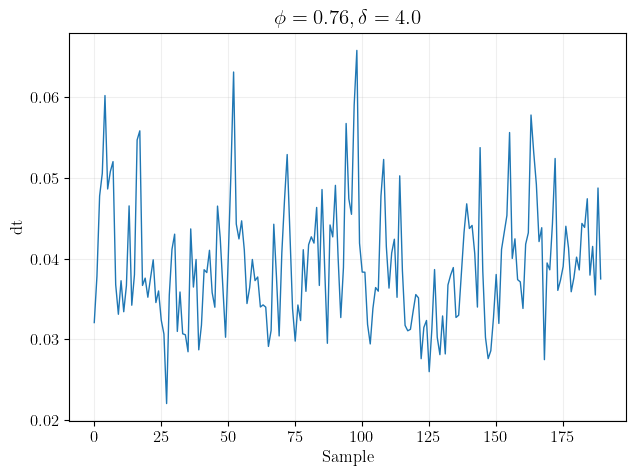

In [34]:
# dt plot
# plot to see time difference between two samples (dt)

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/dt/"

d_skip = 10 # skip these many samples to get a smooth curve

d_np = 1000
d_phi = '0.76'
d_ar = 4.0

filename='NP_'+str(d_np)+'_phi_'+d_phi+'_ar_'+str(d_ar)
if filename in datasets_dict:
    dset = datasets_dict[filename][1][100::d_skip,0]
    ddiff = [(dset[i + 1] - dset[i])/d_skip for i in range(len(dset) - 1)]
    plt.plot(ddiff)
    plt.ylabel('dt', fontsize=12)
    plt.xlabel('Sample', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(which='Both', alpha=0.2)
    plt.title(fr'$\phi={d_phi}, \delta={d_ar}$', fontsize=15)
    plt.tight_layout()
else:
    print('invalid filename')
    
figsave = False
if figsave:
        figFormat=".png"
        plt.savefig(fig_save_path +'dt_phi_'+ str(d_phi) + '_del_' + str(d_ar) + figFormat, bbox_inches="tight",dpi = 500)
plt.show()

In [25]:
## Labels for plots #new

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

labels = [ 
    { #param
        2:  r'$\mathit{\dot \gamma}$',
        3:  r'$\mathit{\eta_{r}}$',
        4:  r'$\mathit{\eta_{contact}}$',
        5:  r'$\mathit{\eta_{dashpot}}$',
        6:  r'$\mathit{\eta_{hydro}}$',
        7:  r'$\mathit{\eta_{repulsion}}$',
        8:  r'$\mathit{\Pi}$',
        10: r'$\mathit{N_{1}}$',
        11: r'$\mathit{\Sigma_{22}}$',
        13: 'min gap',
        16: r'$\mathit{f}_{\mathit{(z \geq 3)}}$',
        30: r'$\mathit{f}_{\mathit{rig}}$',
        33: r'$\langle \mathit{Z}_{\mathit{net}} \rangle$'
    },
    { # fig name
        2:  "shear rate",
        3:  "viscosity",
        4:  "visc(contact)",
        5:  "visc(dashpot)",
        6:  "visc(hydro)",
        7:  "visc(repulsion)",
        8:  "pressure",
        10: "N1",
        11: "N2",
        13: "min_gap",
        16: "f_(z>=3)",
        30: "frig",
        33: "Znet(mean)"
    },
    
]

In [17]:
# To get all plots for all the size ratios and volume fraction (for a particular run) #new

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

#phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76, 0.77, 0.78, 0.79, 0.792]
phi        = [0.75,0.76, 0.77, 0.78, 0.79, 0.792]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]
#ar         = [2.0, 4.0]

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/strain/"

def alldata(npp,x,y,run=1,figsave=False,off=100):
    plt.clf()

    #x: parameter on x axis
    #y: parameter on y axis
    
    FigSize   = (5*4,5*4*3/4)
    cmap = plt.get_cmap('Set1')
    n_rows=len(phi)
    n_cols=len(ar)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=FigSize, sharex=False, sharey=True)
    
    yvals=[]
    for i, phii in enumerate(phi):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for j, arj in enumerate(ar):
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
            if filename in datasets_dict:
                yvals.append(datasets_dict[filename][run-1][off:,y])
    ylist=[item for sublist in yvals for item in sublist]
    
    if len(ar) == 1:
        for i, phii in enumerate(phi):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            for j, arj in enumerate(ar):
                filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
                if filename in datasets_dict:
                    color = cmap(0.0)
                    axs[i].plot(datasets_dict[filename][run-1][off:,x], datasets_dict[filename][run-1][off:,y],color='black')
                    axs[i].grid(which='Both', alpha=0.2)
                    axs[i].set_ylim(min(ylist), max(ylist)*1.01)
                    axs[0].set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
                    axs[-1].set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
                    if y in labels[0]:
                        axs[0].set_ylabel(labels[0][y], fontsize=15)

            axs[i].set_ylabel(labels[0][y], fontsize=15)

            ypos = axs[i].get_position().get_points()[0, 1]
            fig.text(1.00, (ypos*1.18)-.03, fr'$\mathit{{\phi}} = {phir}$', va='center', rotation=90, fontsize=13)
    
    else:
        for i, phii in enumerate(phi):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            for j, arj in enumerate(ar):
                filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
                if filename in datasets_dict:
                    color = cmap(0.0)
                    axs[i, j].plot(datasets_dict[filename][run-1][off:,x], datasets_dict[filename][run-1][off:,y],color='black')
                    axs[i, j].grid(which='Both', alpha=0.2)
                    axs[i, j].set_ylim(min(ylist), max(ylist)*1.01)
                    axs[0, j].set_title(fr'$\mathit{{\delta}} = \mathrm{{{arj}}}$', fontsize=15)
                    axs[-1,j].set_xlabel(r'$\mathit{\gamma}$', fontsize=15)
                    if y in labels[0]:
                        axs[i,0].set_ylabel(labels[0][y], fontsize=15)

            #axs[i, 0].set_ylabel(labels[0][y], fontsize=15)

            ypos = axs[i, 0].get_position().get_points()[0, 1]
            fig.text(1.00, (ypos*1.18)-.03, fr'$\mathit{{\phi}} = {phir}$', va='center', rotation=90, fontsize=18)
        
    fig.suptitle(f'NP = {npp}',fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(top=0.942)
    plt.show()
    
    if figsave:
        figFormat=".pdf"
        fig.savefig(fig_save_path + labels[1][y]+"_vs_strain_run_"+ str(run) +"_NP_"+str(npp)+figFormat, bbox_inches="tight")
    return

<Figure size 640x480 with 0 Axes>

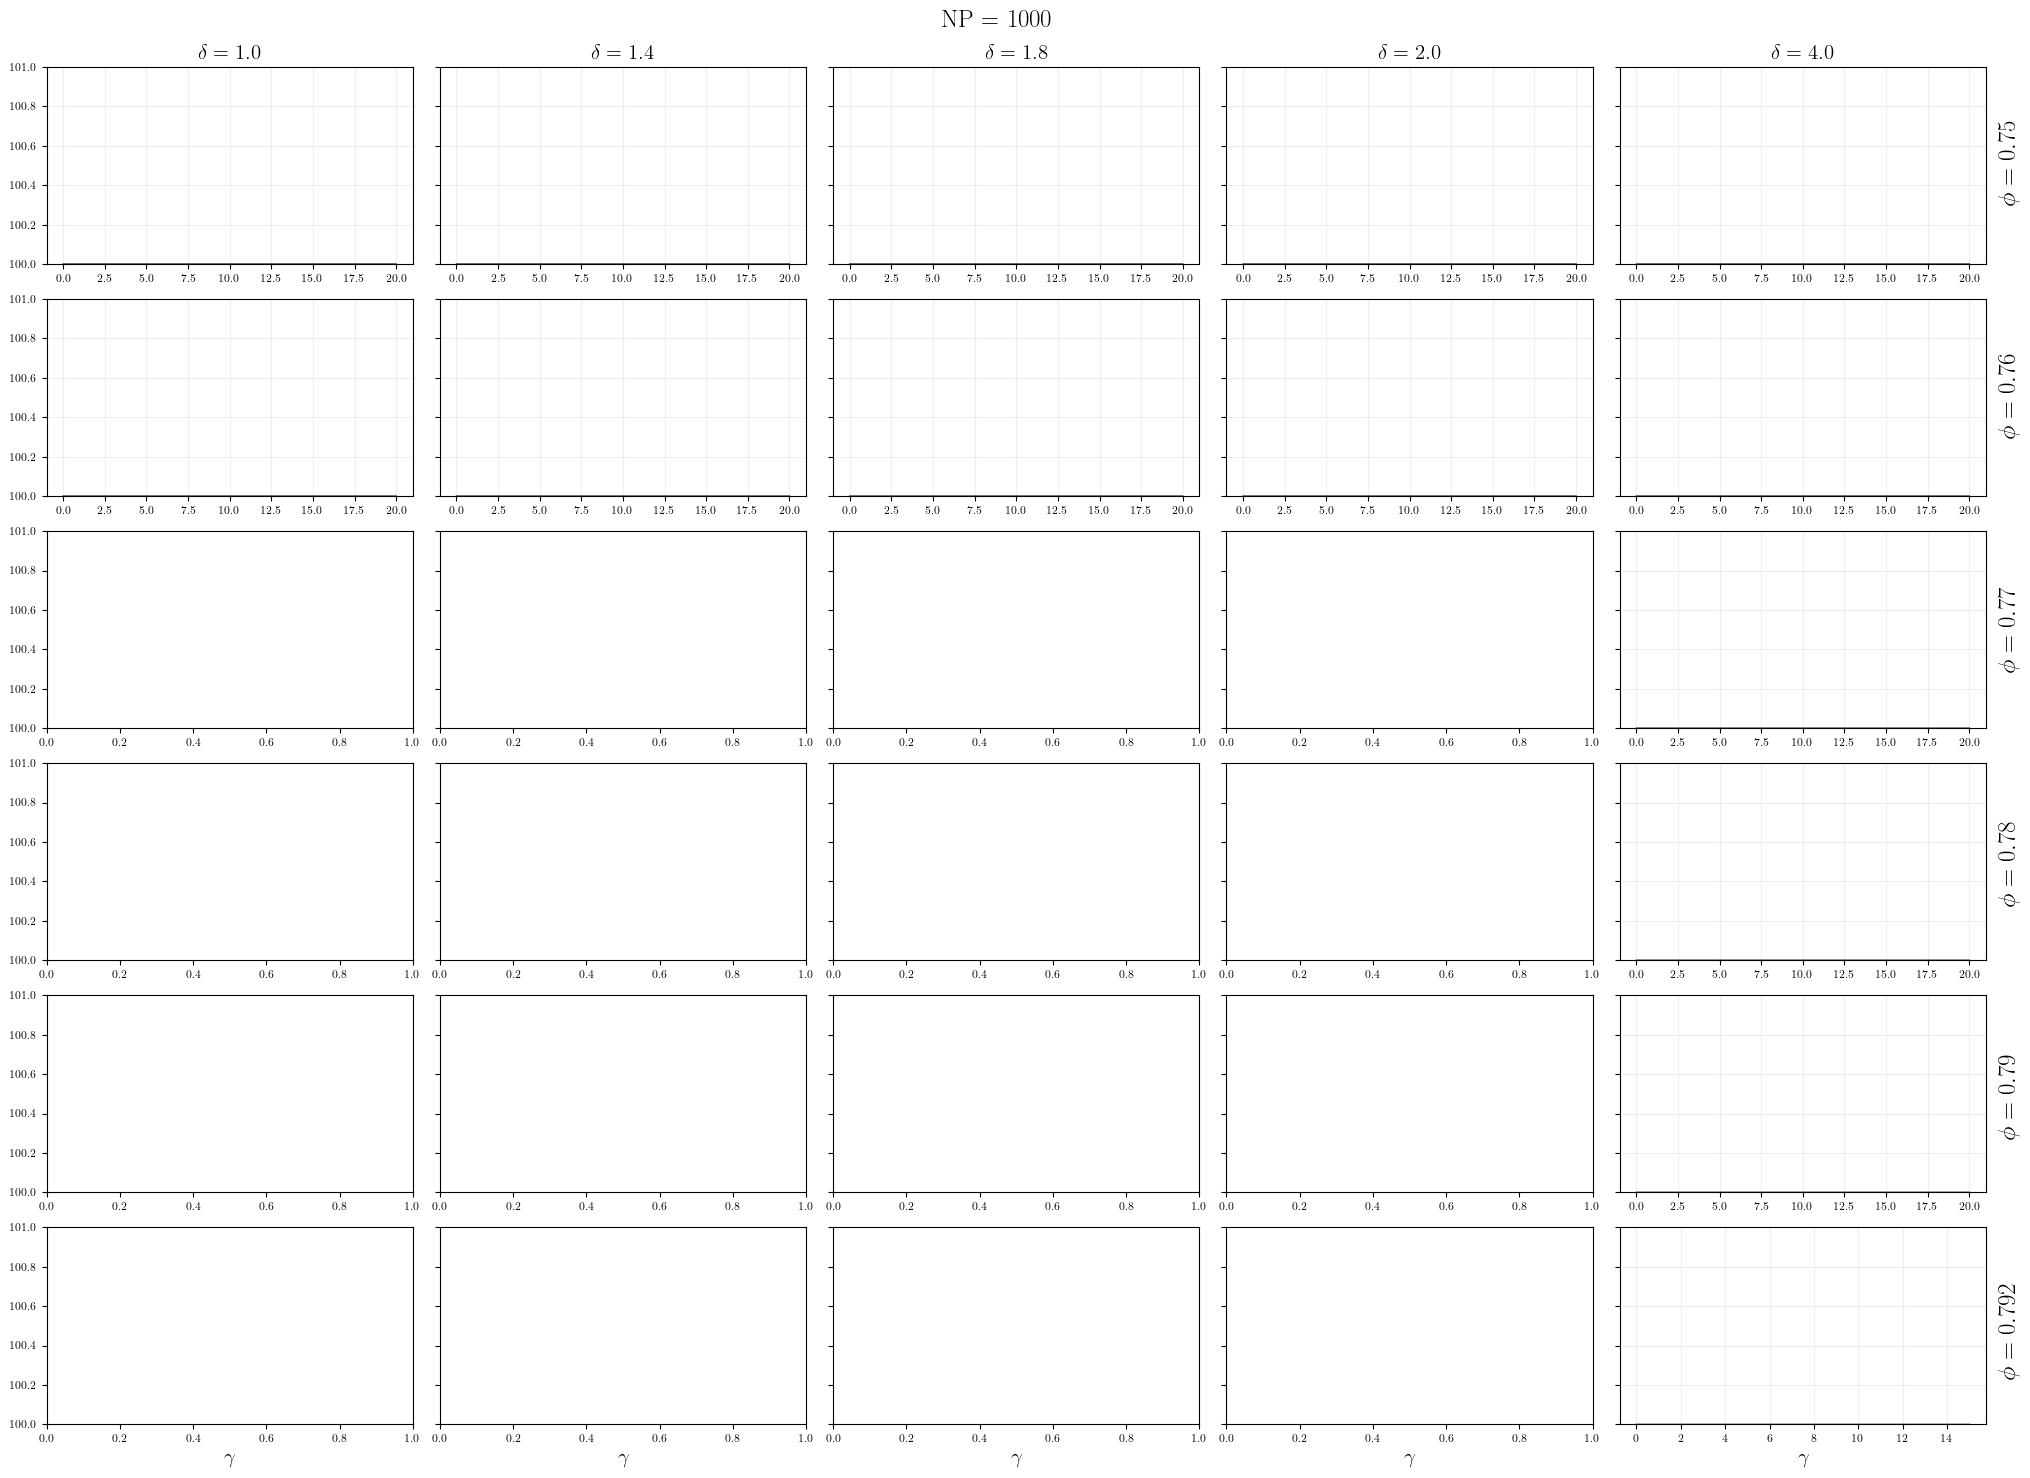

In [22]:
alldata(1000,1,28,run=2,off=0, figsave= False)

### Parameters

| Column 1                   | Column 2                         | Column 3                           | Column 4                           | Column 5                           |
|:----------------------------|:----------------------------------|:------------------------------------|:------------------------------------|:------------------------------------|
| <span style="font-size:16px">0. time</span>                    | <span style="font-size:16px">8. particle pressure</span>       | <span style="font-size:16px">16. frictional contact number</span> | <span style="font-size:16px">24. kt</span>                    | <span style="font-size:16px">32. std(Z)</span>                 |
| <span style="font-size:16px">1. cumulated shear strain</span>   | <span style="font-size:16px">9. particle pressure contact</span> | <span style="font-size:16px">17. average sliding friction</span> | <span style="font-size:16px">25. kr</span>                    | <span style="font-size:16px">33. mean(Znet)</span>              |
| <span style="font-size:16px">2. shear rate</span>               | <span style="font-size:16px">10. N1 viscosity</span>             | <span style="font-size:16px">18. number of interactions</span>  | <span style="font-size:16px">26. shear strain (x) = 0</span>         | <span style="font-size:16px">34. std(Znet)</span>              |
| <span style="font-size:16px">3. viscosity</span>                | <span style="font-size:16px">11. N2 viscosity</span>             | <span style="font-size:16px">19. max tangential displacement</span> | <span style="font-size:16px">27. shear strain (y) = 0</span>         |                                    |
| <span style="font-size:16px">4. Viscosity(contact)</span>       | <span style="font-size:16px">12. energy</span>                   | <span style="font-size:16px">20. max angular velocity</span>   | <span style="font-size:16px">28. shear strain (z)</span>         |                                    |
| <span style="font-size:16px">5. Viscosity(dashpot)</span>       | <span style="font-size:16px">13. min gap</span>                  | <span style="font-size:16px">21. dt</span>                    | <span style="font-size:16px">29. theta shear</span>          |                                    |
| <span style="font-size:16px">6. Viscosity(hydro)</span>         | <span style="font-size:16px">14. max tangential displacement</span> | <span style="font-size:16px">22. max velocity</span>          | <span style="font-size:16px">30. Rigid clusters</span>       |                                    |
| <span style="font-size:16px">7. Viscosity(repulsion)</span>     | <span style="font-size:16px">15. contact number</span>           | <span style="font-size:16px">23. kn</span>                    | <span style="font-size:16px">31. mean(Z)</span>              |                                    |


In [16]:
# To plot parameter vs del/ phi

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/delta/"
#fig_save_path = "/Users/rahul/Downloads/"


NP          = [1000]

phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

# plotting functions
def param_vs_del(npp,y,figsave=False):
    plt.clf()
    arr       = ar #defined earlier while reading data
    cmap      = matplotlib.colormaps['viridis_r'] #color scheme
    
    for i, phii in enumerate(phi):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(datapoint_dict[filename][y])
                daterr.append(std_dev_dict[filename][y])
            else:
                dat.append(float('nan'))
                daterr.append(float('nan'))
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label=r'$\phi$' + f' = {phir}',color=cmap((i+1)/len(phi)),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    #plt.title(labels[0][y], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[0][y],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2, bbox_to_anchor =(0.93, .99), ncol=2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower right', labelspacing=1.5,borderpad=1.2)
    
    plt.tight_layout()
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+labels[1][y]+"_vs_del_NP_"+str(npp)+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def param_vs_phi(npp,y,figsave=False):
    plt.clf()
    phi_vals       = phi
    arr            = ar
    
    cmap = matplotlib.colormaps['viridis_r'] #color scheme
     
    for j, arj in enumerate(arr):
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
            if filename in datasets_dict:
                dat.append(datapoint_dict[filename][y])
                daterr.append(std_dev_dict[filename][y])
            else:
                dat.append(float('nan'))
                daterr.append(float('nan'))
        plt.errorbar(phi_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    #plt.ylim(0, 2100)
    
    #plt.title(labels[1][y], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    
    plt.tight_layout()
    
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+labels[1][y]+"_vs_phi_NP_"+str(npp)+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

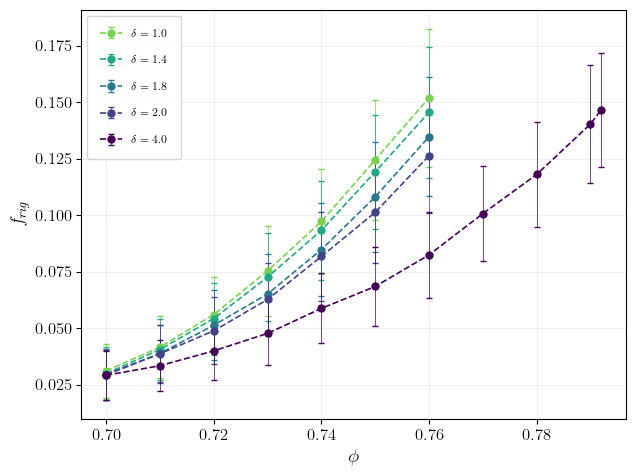

In [17]:
param_vs_phi(1000,30,False)

In [30]:
# To plot one parameter for all the runs for a phi/delta on one single plot

# Creating a new dictionary with steady state points - with mean and std dev in a  dictionary
off=100
datasets2=[]                    
datapoint_dict2 = {key: None for key in datasets2}
std_dev_dict2 = {key: None for key in datasets2}

for key in datasets_dict:
    mean_lists2 = [np.mean(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] #altered list
    #var_lists2 = [np.var(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    std_lists2 = [np.std(matrix[off:,:], axis=0) for matrix in datasets_dict[key]] 
    
    datapoint_dict2[key] = mean_lists
    std_dev_dict2[key] = std_lists
    

NP          = [1000]

phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]


# Plotting function
def runs_vs_del(npp,y,phii=0.75,figsave=False):
    plt.clf()
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for l in range (run[npp]):
        dat=[]
        daterr=[]
        for j, arj in enumerate(arr):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
            if filename in datapoint_dict2:
                dat.append(datapoint_dict2[filename][l][y])
                daterr.append(std_dev_dict2[filename][l][y])
            else:
                dat.append(float('nan'))
                daterr.append(float('nan'))
        plt.errorbar(arr, dat, yerr=daterr,fmt='--o',label='run' + f' {l+1}',color=cmap((l+1)/len(range (run[npp]))),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    #plt.title(labels[0][y], fontsize=18)
    plt.xlabel(r'$\delta$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[2][y],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper right', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+"znetmean_vs_del_runs"+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()
    
def runs_vs_phi(npp,y,dell=1.4,figsave=False):
    plt.clf()
    
    phi_vals  = phi
    arr       = ar
    cmap      = matplotlib.colormaps['viridis_r']
    
    for l in range (run[npp]):
        dat=[]
        daterr=[]
        for i, phii in enumerate(phi_vals):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(dell)
            if filename in datapoint_dict2:
                dat.append(datapoint_dict2[filename][l][y])
                daterr.append(std_dev_dict2[filename][l][y])
            else:
                dat.append(float('nan'))
                daterr.append(float('nan'))
        plt.errorbar(phi_vals, dat, yerr=daterr,fmt='--o',label='run' + f' {l+1}',color=cmap((l+1)/len(range (run[npp]))),capsize=2,linewidth=1.2,elinewidth=.5)
        
    plt.grid(which='Both', alpha=0.2)
    
    #plt.title(labels[1][y], fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[0][y],fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+labels[1][y]+"_vs_phi_runs_NP_"+str(npp)+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

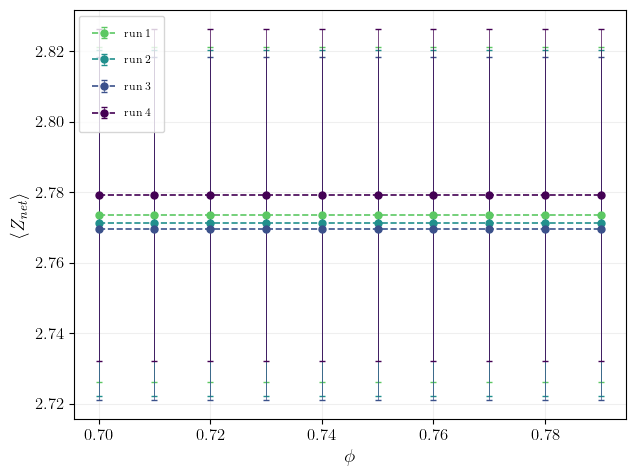

In [32]:
runs_vs_phi(1000,33,4.0,figsave=False)

In [95]:
# To plot points for all the runs for a condition
import sys
# Filter out the specific warning
warnings.filterwarnings("ignore", message="To exit: use 'exit', 'quit', or Ctrl-D.")

def param_vs_run(npp,x,phii=0.79,dell=4.0,figsave=False):
    plt.clf()
    
    runn = [i+1 for i in range(run[npp])]
    cmap      = matplotlib.colormaps['viridis_r']
    
    # redefining phi
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
    filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(dell)
    
    dat=[]
    daterr=[]
    
    if filename not in datapoint_dict2:
        print(f'Case does not exist: phi={phii} & del={dell}')
        sys.exit()
    
    for l in range(run[npp]):
            dat.append(datapoint_dict2[filename][l][x])
            daterr.append(std_dev_dict2[filename][l][x])
    plt.errorbar(list(range(1,run[1000]+1)), dat, yerr=daterr, fmt='o', label=r'$\delta = {:.1f}$, $\phi = {}$'.format(dell, float(phir)), color=cmap((l+1)/len(range(run[npp]))), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    #plt.title(labels[1][x], fontsize=18)
    plt.xlabel('run', fontsize=14,fontstyle='italic')
    plt.ylabel(labels[0][x],fontsize=14,fontstyle='italic')

    plt.xticks(runn,fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    plt.tight_layout()
    
    plt.ylim(np.mean(dat)*.2, np.mean(dat)*1.8)
    
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+labels[1][y]+"_vs_runs_NP_"+str(npp)+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

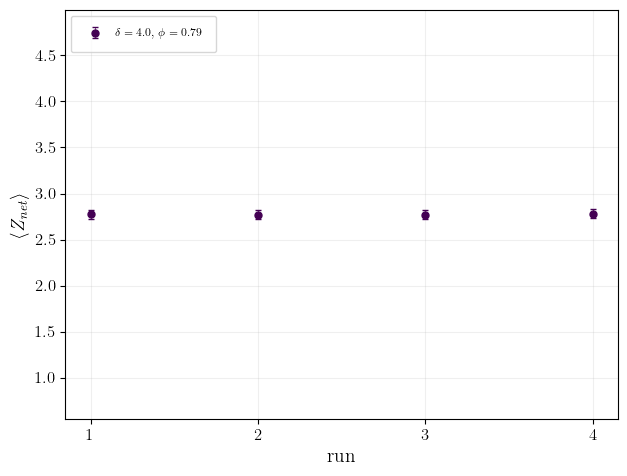

In [96]:
param_vs_run(1000,33,figsave=False)

In [97]:
# Plotting the signal (all samples) with a running average for all runs on a plot

def param_vs_gamma_runs(npp,y,x,phii=0.75,dell=1.4,figsave=False,off=100):
    plt.clf()
    
    arj = dell
    cmap = matplotlib.colormaps['viridis_r']
    
    # redefining phi
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
    filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
    window=100
    ylist=[]
    
    if filename not in datapoint_dict2:
        print(f'Case does not exist: phi={phii} & del={dell}')
        sys.exit()
        
    for l in range(run[npp]):
        param_avg = np.convolve(datasets_dict[filename][l][off:,x], np.ones(window)/window, mode='valid')
        gamma_new=datasets_dict[filename][l][off:,y]
        plt.plot(gamma_new[window-1:], param_avg,label='run {}'.format(l+1), color=cmap((l+1)/len(range(run[npp]))), linewidth=1.2)
        color = cmap(0.0)
        ylist.append(param_avg)
    
    ylist_new = [item for sublist in ylist for item in sublist]
    plt.ylim(min(ylist_new)*0.98, max(ylist_new)*1.02)
    plt.legend()
    #plt.title(labels[1][x], fontsize=15)
    plt.xlabel(r'$\mathit{\gamma}$', fontsize=15)
    plt.ylabel(labels[0][x],fontsize=14,fontstyle='italic')
    plt.grid(which='Both', alpha=0.2)
    plt.tight_layout()
    
    if figsave:
        figFormat=".pdf"
        plt.savefig(fig_save_path+labels[1][y]+"_vs_strain_runs_NP_"+str(npp)+figFormat, bbox_inches="tight")
    return
    plt.show()

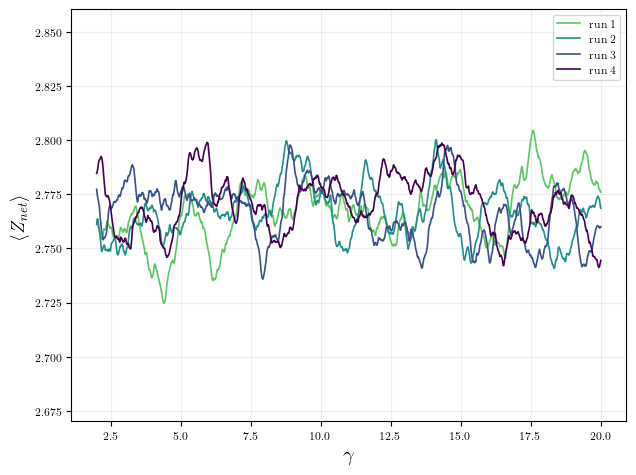

In [98]:
param_vs_gamma_runs(1000,1,33,figsave=False)

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.784 | 1.567 | 0.998 |
|  1.4  | 0.783 | 1.627 | 0.999 |
|  1.8  | 0.785 | 1.566 | 1.000 |
|  2.0  | 0.788 | 1.596 | 1.000 |
|  4.0  | 0.818 | 2.045 | 0.999 |
+-------+-------+-------+-------+

 R-squared mean: 0.999


<Figure size 640x480 with 0 Axes>

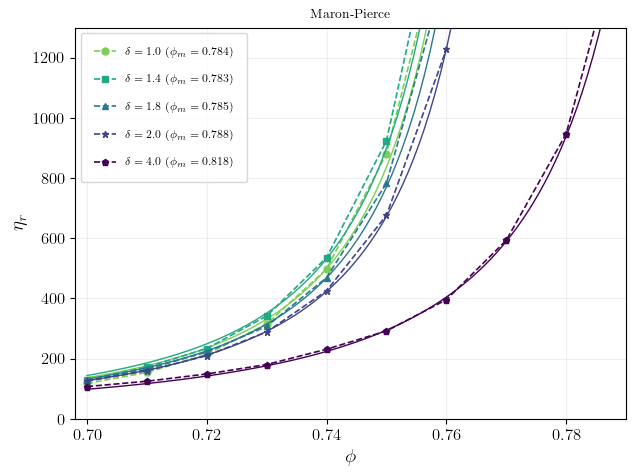

In [26]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

plt.clf()

# Parameters
phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79, 0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/k)) ** -2

#Krieger & Dougherty (1959)
def kriegerdougherty(x,c,k):
    return c*(1 - (x/k))**(-2.5*k)

#Frankel & Acrivos (1967)
def frankelacrivos(x,c,k):
    r=x/k
    return c * 9/8 * (r**(1/3)/(1-r**(1/3)))

#Chong et al. (1971)
def chong(x,c,k):
    r=x/k
    return c*(1 + 0.75*r/(1 - r))**2

#Lewis & Nielsen (1968)
def lewisnielsen(x,c,k):
    return c * (1 + (1.5*x/(1 - (x/k))))**2

#Mendoza (2011)
def mendoza(x,c,k):
    r=(1-k)/k
    return c*(1 - x/(1 - r*x))**-2.5

models = [maronpierce ,kriegerdougherty, frankelacrivos, lewisnielsen, chong, mendoza]
title_ = ["Maron-Pierce",r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpierce # Choosing a model to fit

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.765,.765,.77,.78,.793] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    dat = []
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
        else:
            dat.append(float('nan'))
            
    # points to fit
    datf = [x for x in dat if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif = [phi_vals[i] for i in range(len(datf)) if not np.isnan(datf[i])] # filtered phi list to remove phi values for cases that dont exist
    
    # curve fit
    popt, pcov   = curve_fit(model, phif,datf,[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals, dat,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .79, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(datf, y_predicted)]
        TSS = np.sum((datf - np.mean(datf))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.698, .79)
plt.ylim(0, 1300)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [27]:
phim

[0.7839319624271287,
 0.7833175449290914,
 0.7854135255405496,
 0.7884149255295934,
 0.818194260057053]

In [16]:
datapoint_dict['NP_1000_phi_0.77_ar_2.0'][3]

KeyError: 'NP_1000_phi_0.77_ar_2.0'

In [38]:
0.78/.818

0.9535452322738387

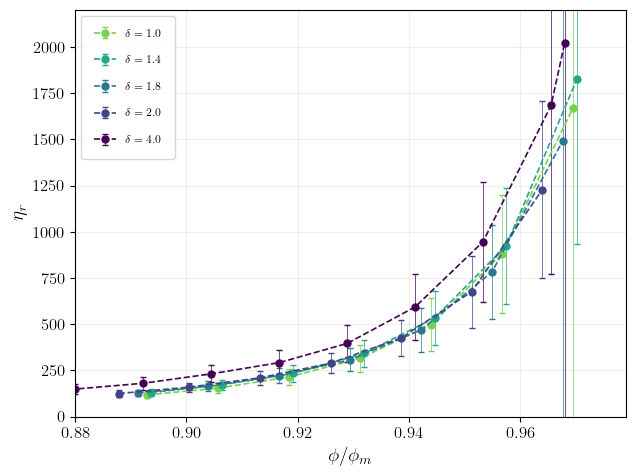

In [30]:
# To plot parameter vs phim

# plotting functions

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"


npp=1000
y=3
plt.clf()
phi_vals       = phi
arr            = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme

for j, arj in enumerate(arr):
    dat=[]
    daterr=[]
    phim_vals      = [i/phim[j] for i in phi]
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
            daterr.append(std_dev_dict[filename][y])
        else:
            dat.append(float('nan'))
            daterr.append(float('nan'))
    plt.errorbar(phim_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')

plt.xlim(.88,.979)
plt.ylim(0,2200)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)

plt.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

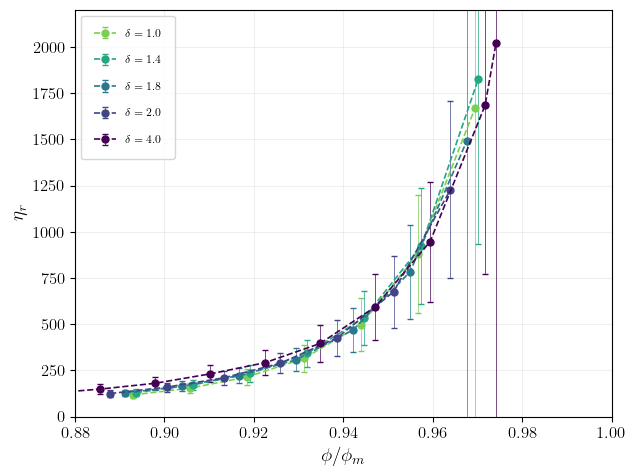

In [102]:
# To plot parameter vs phim

# plotting functions

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

# new phim for ar=4.0
phim[4] = .813


npp = 1000
y   = 3
plt.clf()
phi_vals       = phi
arr            = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme

for j, arj in enumerate(arr):
    dat=[]
    daterr=[]
    phim_vals      = [i/phim[j] for i in phi]
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
            daterr.append(std_dev_dict[filename][y])
        else:
            dat.append(float('nan'))
            daterr.append(float('nan'))
    plt.errorbar(phim_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')

plt.xlim(.88,1)
plt.ylim(0,2200)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)

plt.tight_layout()

figsave=False
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)
plt.show()

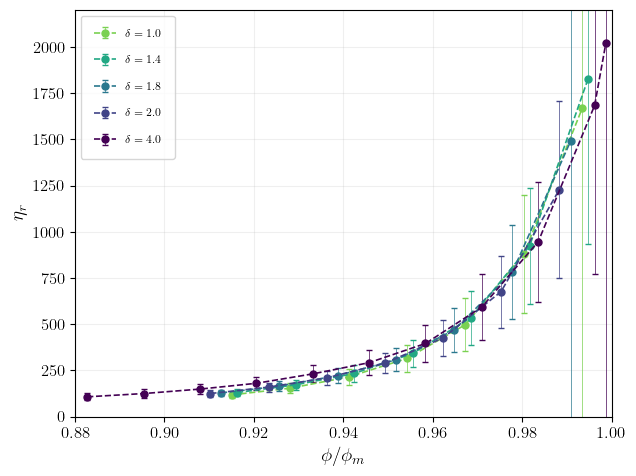

In [13]:
# To plot parameter vs phim

# plotting functions


phim_=[0.765,0.764,0.767,0.769,0.793]
#fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"
fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/"

    
npp = 1000
y = 3
plt.clf()
phi_vals       = phi
arr            = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme

for j, arj in enumerate(arr):
    dat=[]
    daterr=[]
    phim_vals      = [i/phim_[j] for i in phi]
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
            daterr.append(std_dev_dict[filename][y])
        else:
            dat.append(float('nan'))
            daterr.append(float('nan'))
    plt.errorbar(phim_vals, dat, yerr=daterr, fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

plt.grid(which='Both', alpha=0.2)

#plt.title(labels[1][y], fontsize=18)
plt.xlabel(r'$\phi/\phi_m$', fontsize=14,fontstyle='italic')
plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')

plt.xlim(.88,1)
plt.ylim(0,2200)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)

plt.tight_layout()

figsave=True
if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_2_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.780 | 0.894 | 1.000 |
|  1.4  | 0.781 | 0.843 | 1.000 |
|  1.8  | 0.784 | 0.820 | 1.000 |
|  2.0  | 0.789 | 0.792 | 1.000 |
|  4.0  | 0.820 | 0.668 | 1.000 |
+-------+-------+-------+-------+

 R-squared mean: 1.000


<Figure size 640x480 with 0 Axes>

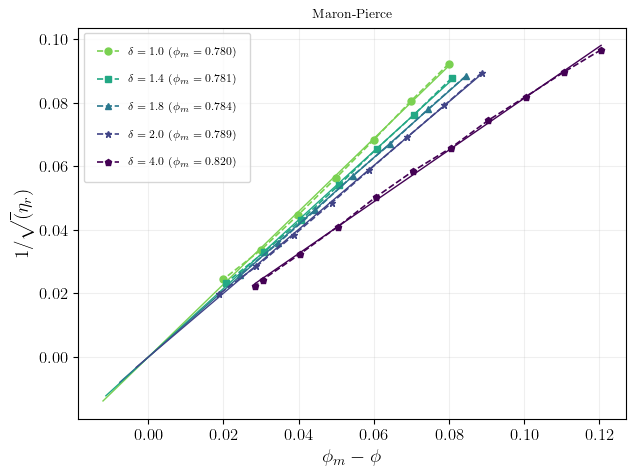

In [40]:
# maron pierce plot with inverse of viscosity
#phim
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

plt.clf()

# Parameters
phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956) with inverse of visc
def maronpierce(x,c, k):
    return (c/k)*(k-x)


models = [maronpierce]
title_ = ["Maron-Pierce",r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpierce # Choosing a model to fit

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.765,.765,.77,.78,.791] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    dat = []
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
        else:
            dat.append(float('nan'))
            
    # points to fit
    datf = [x for x in dat if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif = [phi_vals[i] for i in range(len(datf)) if not np.isnan(datf[i])] # filtered phi list to remove phi values for cases that dont exist
    
    # curve fit
    popt, pcov   = curve_fit(model, phif,1/np.sqrt(datf),[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot((k_opt-phi_vals), 1/np.sqrt(dat),linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .792, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot((k_opt-xx), yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(1/np.sqrt(datf), y_predicted)]
        TSS = np.sum((datf - np.mean(1/np.sqrt(datf)))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
#plt.xlim(.01, .13)
#plt.ylim(0, 1300)
plt.xlabel(r'$\phi_m - \phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$1/\sqrt(\eta_r)$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=True

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [16]:
c_opt, k_opt 

(215742.28956894705, 0.7901492514741055)

In [26]:
phim_=[0.765,0.765,0.765,0.775,0.793]

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.780 | 0.894 | 1.000 |
|  1.4  | 0.781 | 0.843 | 1.000 |
|  1.8  | 0.784 | 0.820 | 1.000 |
|  2.0  | 0.789 | 0.792 | 1.000 |
|  4.0  | 0.820 | 0.668 | 1.000 |
+-------+-------+-------+-------+

 R-squared mean: 1.000


<Figure size 640x480 with 0 Axes>

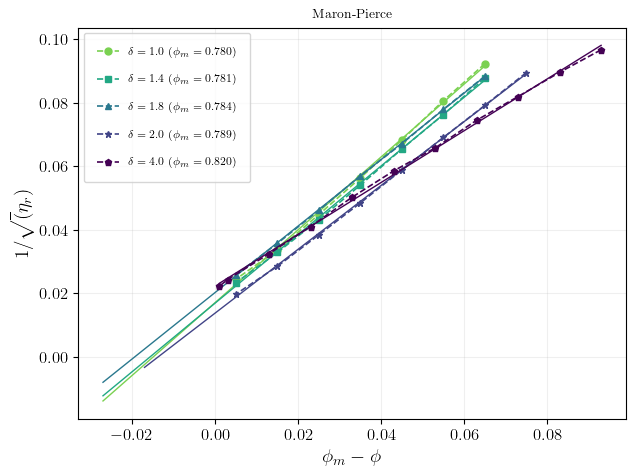

In [45]:
# maron pierce plot with inverse of viscosity
#phim_
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

plt.clf()

# Parameters
phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956) with inverse of visc
def maronpierce(x,c, k):
    return (c/k)*(k-x)


models = [maronpierce]
title_ = ["Maron-Pierce",r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpierce # Choosing a model to fit

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.765,.765,.77,.78,.791] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    dat = []
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
        else:
            dat.append(float('nan'))
            
    # points to fit
    datf = [x for x in dat if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif = [phi_vals[i] for i in range(len(datf)) if not np.isnan(datf[i])] # filtered phi list to remove phi values for cases that dont exist
    
    # curve fit
    popt, pcov   = curve_fit(model, phif,1/np.sqrt(datf),[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot((np.float64(phim_[j])-phi_vals), 1/np.sqrt(dat),linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .792, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot((np.float64(phim_[j])-xx), yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(1/np.sqrt(datf), y_predicted)]
        TSS = np.sum((datf - np.mean(1/np.sqrt(datf)))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
#plt.xlim(-10, 60)
#plt.ylim(0, 1300)
plt.xlabel(r'$\phi_m - \phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$1/\sqrt(\eta_r)$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [43]:
(np.float64(phim_[1]))-phi_vals

array([ 0.065,  0.055,  0.045,  0.035,  0.025,  0.015,  0.005, -0.005,
       -0.015, -0.025, -0.027])

In [37]:
type(k_opt)

numpy.float64

In [69]:
# To plot parameter vs phim

# plotting functions

#fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"
fig_save_path = "/Users/rahul/Downloads/"

def param_vs_phim(npp,y,figsave=False):
    plt.clf()
    phi_vals       = phi
    arr            = ar
    
    cmap = matplotlib.colormaps['viridis_r'] #color scheme
     
    for j, arj in enumerate(arr):
        dat=[]
        daterr=[]
        phim_vals      = [phim_[j]-i for i in phi]
        for i, phii in enumerate(phi_vals):
            # redefining phi
            phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
            if filename in datapoint_dict:
                dat.append(datapoint_dict[filename][y])
                daterr.append(std_dev_dict[filename][y])
            else:
                dat.append(float('nan'))
                daterr.append(float('nan'))
        plt.errorbar(np.log(phim_vals), np.log(dat), yerr=np.log(daterr), fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)

    plt.grid(which='Both', alpha=0.2)
    
    #plt.title(labels[1][y], fontsize=18)
    plt.xlabel(r'log($\phi_m - \phi$)', fontsize=14,fontstyle='italic')
    plt.ylabel("log("+labels[0][y]+")", fontsize=14,fontstyle='italic')
    
    #plt.xlim(.88,1)
    plt.ylim(2.5,10)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    
    plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
    #plt.legend(loc='upper left', labelspacing=1.2,borderpad=1.0)
    #plt.legend(loc='lower left', labelspacing=1.5,borderpad=1.2)
    
    plt.tight_layout()
    
    if figsave:
        figFormat=".png"
        plt.savefig(fig_save_path+labels[1][y]+'_vs_phim(modified)_'+str(npp)+figFormat, bbox_inches="tight",dpi=500)
    return
    plt.show()

/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_18061/956192318.py:29: RuntimeWarning: invalid value encountered in log
  plt.errorbar(np.log(phim_vals), np.log(dat), yerr=np.log(daterr), fmt='--o', label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(arr)), capsize=2, linewidth=1.2, elinewidth=0.5)


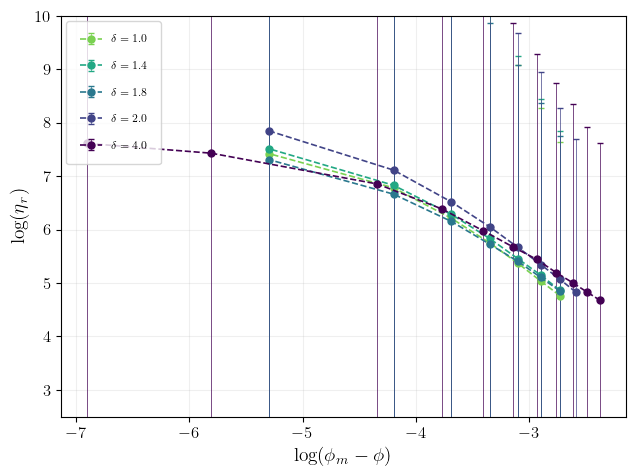

In [70]:
param_vs_phim(1000,3,True)

In [25]:
filename='NP_'+str(1000)+'_phi_'+"{:.2f}".format(0.75)+'_ar_'+str(1.0)
datapoint_dict[filename][3]

880.8348550762756

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.781 | 1.331 | 1.000 |
|  1.4  | 0.782 | 1.469 | 1.000 |
|  1.8  | 0.785 | 1.503 | 1.000 |
|  2.0  | 0.790 | 1.651 | 1.000 |
|  4.0  | 0.819 | 2.163 | 1.000 |
+-------+-------+-------+-------+

 R-squared mean: 1.000


<Figure size 640x480 with 0 Axes>

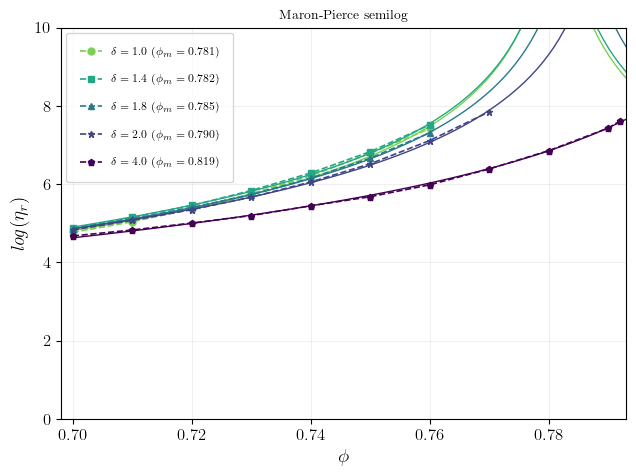

In [20]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

#fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"
fig_save_path = "/Users/rahul/Downloads/"

plt.clf()

# Parameters
phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/k)) ** -2

# Maron & Pierce log (1956)
def maronpiercelog(x,c, k):
    return np.log(c*(1 - (x/k)) ** -2)

#Krieger & Dougherty (1959)
def kriegerdougherty(x,c,k):
    return c*(1 - (x/k))**(-2.5*k)

#Frankel & Acrivos (1967)
def frankelacrivos(x,c,k):
    r=x/k
    return c * 9/8 * (r**(1/3)/(1-r**(1/3)))

#Chong et al. (1971)
def chong(x,c,k):
    r=x/k
    return c*(1 + 0.75*r/(1 - r))**2

#Lewis & Nielsen (1968)
def lewisnielsen(x,c,k):
    return c * (1 + (1.5*x/(1 - (x/k))))**2

#Mendoza (2011)
def mendoza(x,c,k):
    r=(1-k)/k
    return c*(1 - x/(1 - r*x))**-2.5

models = [maronpierce , maronpiercelog, kriegerdougherty, frankelacrivos, lewisnielsen, chong, mendoza]
title_ = ["Maron-Pierce","Maron-Pierce semilog", r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpiercelog # Choosing a model to fit

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.765,.765,.77,.78,.793] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    dat = []
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
        else:
            dat.append(float('nan'))
            
    # points to fit
    datf = [x for x in dat if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif = [phi_vals[i] for i in range(len(datf)) if not np.isnan(datf[i])] # filtered phi list to remove phi values for cases that dont exist
    
    # curve fit
    popt, pcov   = curve_fit(model, phif,np.log(datf),[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals, np.log(dat),linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .793, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(np.log(datf), y_predicted)]
        TSS = np.sum((datf - np.mean(datf))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.698, .793)
plt.ylim(0, 10)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
#plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')
plt.ylabel(r'$\mathit{log(\eta_{r})}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=True

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.781 | 1.302 | 1.000 |
|  1.4  | 0.781 | 1.448 | 1.000 |
|  1.8  | 0.785 | 1.497 | 1.000 |
|  2.0  | 0.789 | 1.631 | 1.000 |
|  4.0  | 0.820 | 2.188 | 1.000 |
+-------+-------+-------+-------+

 R-squared mean: 1.000


<Figure size 640x480 with 0 Axes>

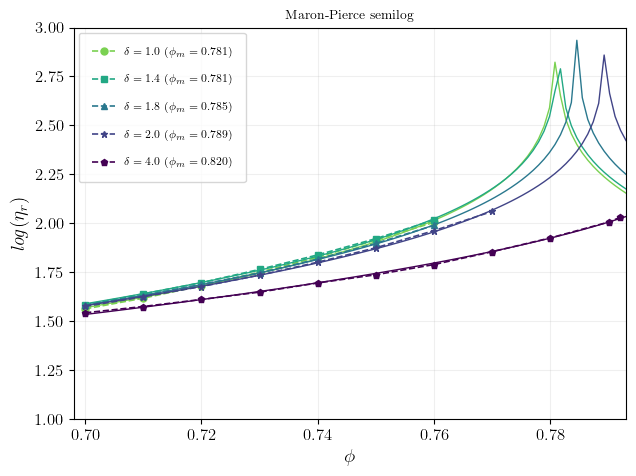

In [24]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

#fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"
fig_save_path = "/Users/rahul/Downloads/"

plt.clf()

# Parameters
phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/k)) ** -2

# Maron & Pierce log (1956)
def maronpiercelog(x,c, k):
    return np.log(np.log(c*(1 - (x/k)) ** -2))

#Krieger & Dougherty (1959)
def kriegerdougherty(x,c,k):
    return c*(1 - (x/k))**(-2.5*k)

#Frankel & Acrivos (1967)
def frankelacrivos(x,c,k):
    r=x/k
    return c * 9/8 * (r**(1/3)/(1-r**(1/3)))

#Chong et al. (1971)
def chong(x,c,k):
    r=x/k
    return c*(1 + 0.75*r/(1 - r))**2

#Lewis & Nielsen (1968)
def lewisnielsen(x,c,k):
    return c * (1 + (1.5*x/(1 - (x/k))))**2

#Mendoza (2011)
def mendoza(x,c,k):
    r=(1-k)/k
    return c*(1 - x/(1 - r*x))**-2.5

models = [maronpierce , maronpiercelog, kriegerdougherty, frankelacrivos, lewisnielsen, chong, mendoza]
title_ = ["Maron-Pierce","Maron-Pierce semilog", r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpiercelog # Choosing a model to fit

plt.figure()

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.765,.765,.77,.78,.793] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    dat = []
    for i, phii in enumerate(phi_vals):
        # redefining phi
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(arj)
        if filename in datapoint_dict:
            dat.append(datapoint_dict[filename][y])
        else:
            dat.append(float('nan'))
            
    # points to fit
    datf = [x for x in dat if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif = [phi_vals[i] for i in range(len(datf)) if not np.isnan(datf[i])] # filtered phi list to remove phi values for cases that dont exist
    
    # curve fit
    popt, pcov   = curve_fit(model, phif,np.log(np.log(datf)),[1,k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals, np.log(np.log(dat)),linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .793, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(np.log(np.log(datf)), y_predicted)]
        TSS = np.sum((datf - np.mean(datf))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.698, .793)
plt.ylim(1, 3)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
#plt.ylabel(labels[0][y], fontsize=14,fontstyle='italic')
plt.ylabel(r'$\mathit{log(\eta_{r})}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

### Individual plots

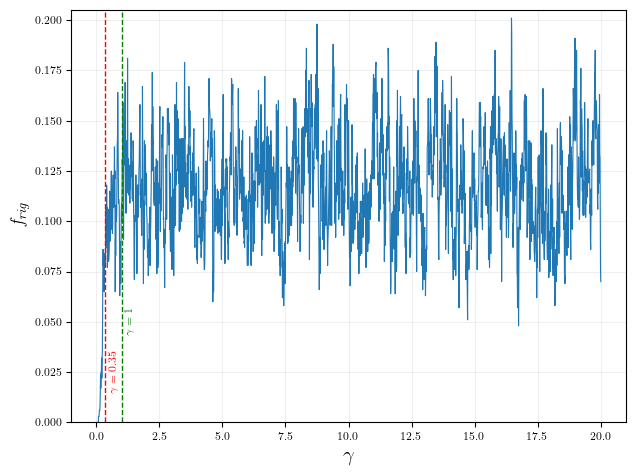

In [127]:
## Param vs gamma (for a single run)
# plot for a specific condition. Here particularly to showcase that the cut off is justified

plt.clf()

phii = 0.75
arj = 1.4
runn = 1
paramx = 30 # 33 is znet(mean) #30 is frig
paramy = 1
off = 0

cmap      = matplotlib.colormaps['viridis_r']

filename='NP_'+str(1000)+'_phi_'+"{:.2f}".format(phii)+'_ar_'+str(arj)
window=1
ylist=[]

param_avg = np.convolve(datasets_dict[filename][runn][off:,paramx], np.ones(window)/window, mode='valid')
gamma_new=datasets_dict[filename][runn][off:,paramy]
plt.plot(gamma_new[window-1:], param_avg,label='run {}'.format(runn+1), linewidth=.8)
color = cmap(0.0)
ylist.append(param_avg)

ylist_ = [item for sublist in ylist for item in sublist]
plt.ylim(min(ylist_)*0.98, max(ylist_)*1.02)

#plt.title(labels[1][paramx], fontsize=15)
plt.xlabel(r'$\mathit{\gamma}$', fontsize=15)
plt.ylabel(labels[2][paramx],fontsize=14,fontstyle='italic')
plt.grid(which='Both', alpha=0.2)

plt.axvline(x=.35, color='r', linestyle='--')
#plt.text(.5, 1, r'$\gamma = 0.35$', rotation=90, verticalalignment='center',color='red')
plt.text(.5, .025, r'$\gamma = 0.35$', rotation=90, verticalalignment='center',color='red')
plt.axvline(x=1, color='g', linestyle='--')
#plt.text(1.15, 1.5, r'$\gamma = 1$', rotation=90, verticalalignment='center',color='green')
plt.text(1.15, .05, r'$\gamma = 1$', rotation=90, verticalalignment='center',color='green')

plt.tight_layout()

figFormat=".pdf"; plt.savefig(fig_save_path+"frig_vs_strain_cutoff"+figFormat, bbox_inches="tight")
plt.show()

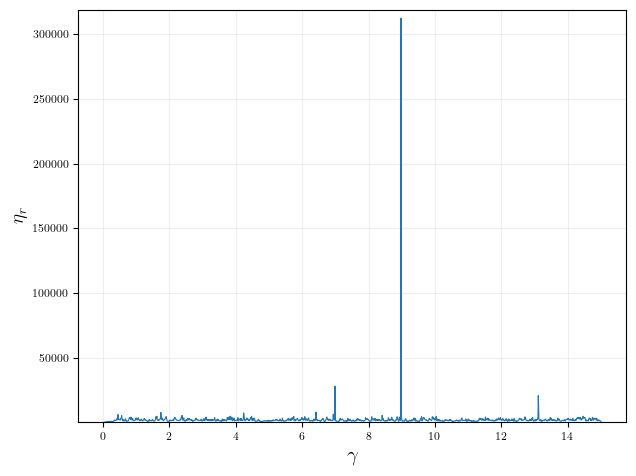

In [26]:
## Param vs gamma (for a single run)
# plot for a specific condition. Here particularly to showcase that the cut off is justified

plt.clf()

phii = 0.792
arj = 4.0
runn = 1
paramx = 3 # 33 is znet(mean) #30 is frig
paramy = 1
off = 0

cmap      = matplotlib.colormaps['viridis_r']
phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii) # redefining phi

filename='NP_'+str(1000)+'_phi_'+phir+'_ar_'+str(arj)
window=1
ylist=[]

param_avg = np.convolve(datasets_dict[filename][runn][off:,paramx], np.ones(window)/window, mode='valid')
gamma_new=datasets_dict[filename][runn][off:,paramy]
plt.plot(gamma_new[window-1:], param_avg,label='run {}'.format(runn+1), linewidth=.8)
color = cmap(0.0)
ylist.append(param_avg)

ylist_ = [item for sublist in ylist for item in sublist]
plt.ylim(min(ylist_)*0.98, max(ylist_)*1.02)

#plt.title(labels[1][paramx], fontsize=15)
plt.xlabel(r'$\mathit{\gamma}$', fontsize=15)
plt.ylabel(labels[0][paramx],fontsize=14,fontstyle='italic')
plt.grid(which='Both', alpha=0.2)

plt.tight_layout()


fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/"
figFormat=".pdf"; plt.savefig(fig_save_path+"visc_vs_strain_792_run_2"+figFormat, bbox_inches="tight")
plt.show()

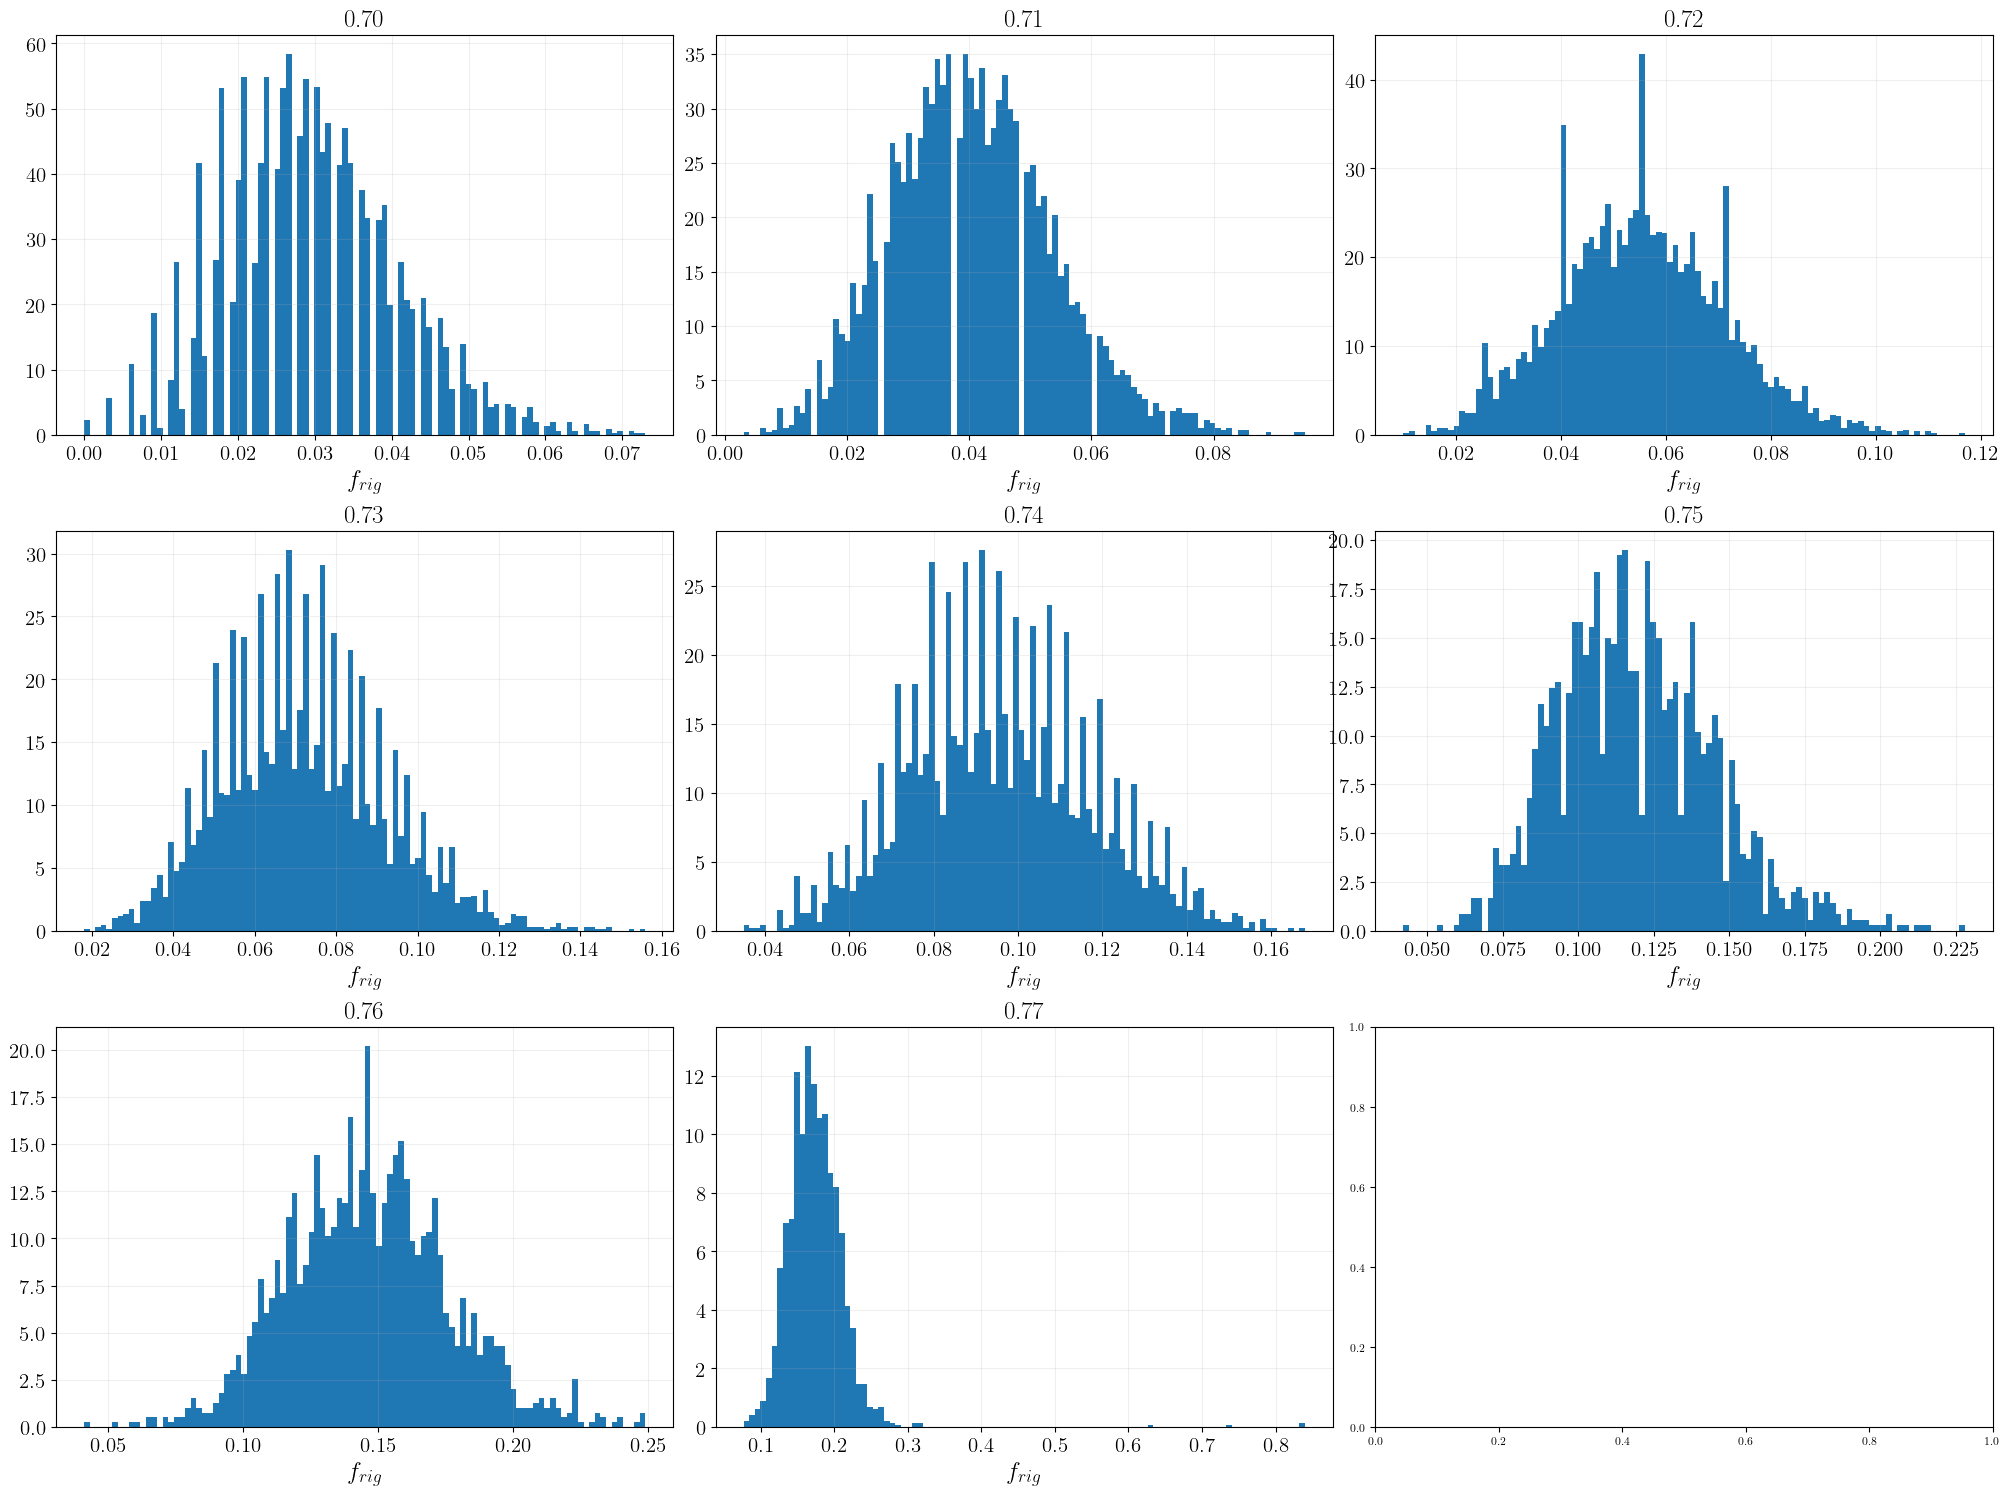

In [96]:
# f_rig histograms

TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77]

ar          = [1.4]

rigFile = 'F_rig.txt'
cols = 3
rows = math.ceil(len(phi)/3)
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[i]]):
                    with open(f'{dataname}/run_{l+1}/{rigFile}', 'r') as file:
                        rigList = np.loadtxt(file)
                    counts, bin_edges = np.histogram(rigList[100:]/1000, bins=100, density=True)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                    
                    ax = axes[j // cols, j % cols]
                    ax.grid(which = 'Both', alpha = 0.2)
                    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0])
                    ax.set_title(f'{phir}', fontsize = 18, fontweight='bold')
                    ax.set_xlabel(r'$f_{rig}$', fontsize = 18)
                    ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

[]
[]
[48, 214]


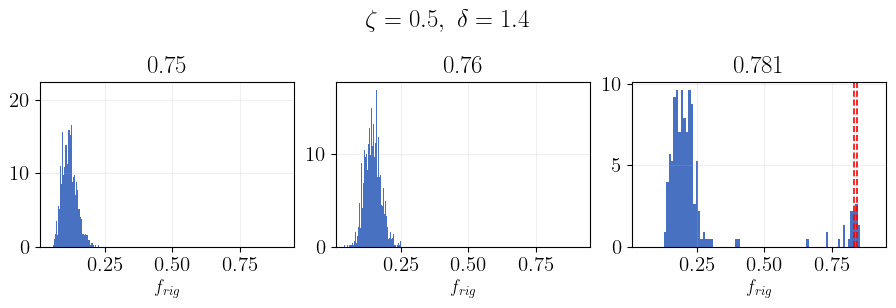

In [122]:
# f_rig histograms
# sent to jeff
import glob

#TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)
TopDir        = "/Volumes/Rahul_2TB/high_bidispersity/"
fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/rigidity_criticality/very_rigid_particles/"

npp    = 1000
numRun = 1 # out of 4
phi    = [0.75, 0.76, 0.78]
ar     = '1.0'
off    = 50
rigFile = 'F_rig.txt'

#frigList = []
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for j in range(len(phi)):
    phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
    if j == 2:
        ar = ar #+ 'x'
    dataname=TopDir+'NP_'+ str(npp) + '/phi_' + phir + '/ar_' + ar + '/Vr_0.5'
    if os.path.exists(dataname):
        with open(f'{dataname}/run_{numRun}/{rigFile}', 'r') as file:
            rigList = np.loadtxt(file)
        counts, bin_edges = np.histogram(rigList[off:]/npp, bins=80, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        axs[j].grid(which = 'Both', alpha = 0.2)
        axs[j].bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color=(0.1, 0.3, 0.7, 0.8))
        axs[j].set_title(f'{phir}', fontsize = 18, fontweight='bold')
        axs[j].set_xlabel(r'$f_{rig}$', fontsize = 13)
        axs[j].set_xlim([0.01, 0.95])
        axs[j].tick_params(axis='both', which='major', labelsize=15)

        dataFile1 = glob.glob(f'{dataname}/run_{numRun}/data_*.dat')[0]
        data1     = np.loadtxt(dataFile1)
        srate     = data1[off:, 2]
        jammed_srate = [index for index, value in enumerate(srate) if value < 0]
        print(jammed_srate)

        for index, value in enumerate(jammed_srate):
            bar_x = list(rigList[off:])[value]/npp  # x position of the bar
            plt.axvline(x=bar_x, color='red', linestyle='--', linewidth=1.2)

            
fig.suptitle(fr'$\zeta = 0.5, \; \delta = {ar[:3]}$', fontsize=18, y=1)
if True:
    figFormat=".png"
    plt.savefig(fig_save_path + "rig_criticality_vrigid" + "_" + ar + figFormat, bbox_inches="tight", dpi=500)
plt.show()

In [88]:
dataname

'/Volumes/Rahul_2TB/high_bidispersity/NP_1000/phi_0.784/ar_1.4x/Vr_0.5'

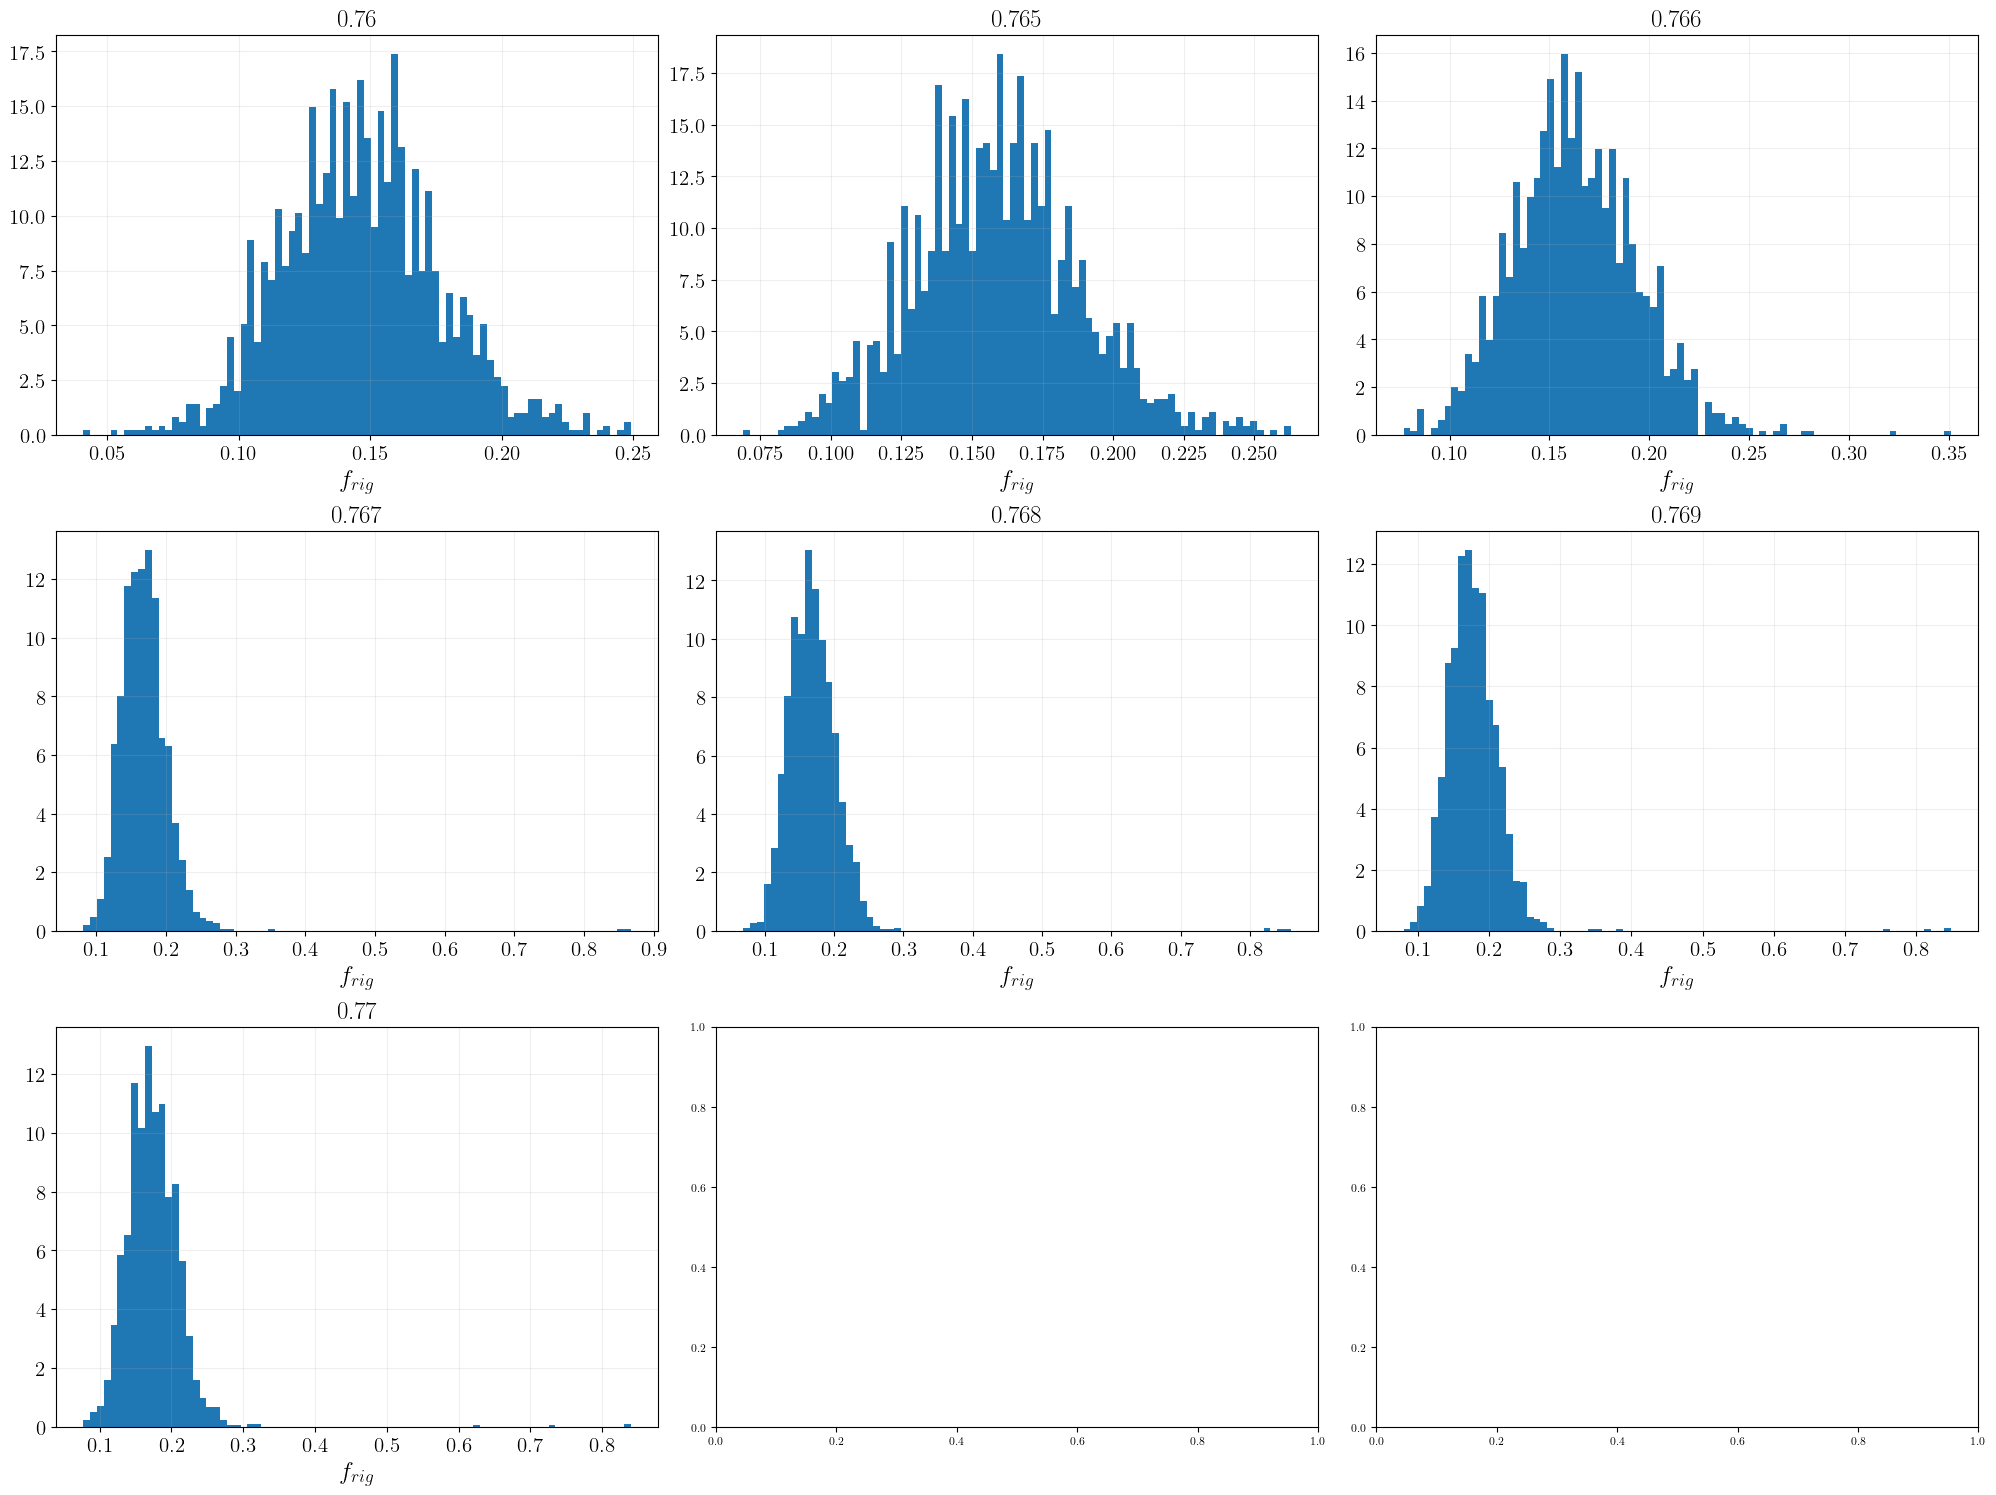

In [94]:
# f_rig histograms

TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.76, 0.765, 0.766, 0.767, 0.768, 0.769, 0.77, 0.78]

ar          = [1.4]

rigFile = 'F_rig.txt'
cols = 3
rows = math.ceil(len(phi)/3)
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[i]]):
                    with open(f'{dataname}/run_{l+1}/{rigFile}', 'r') as file:
                        rigList = np.loadtxt(file)
                    counts, bin_edges = np.histogram(rigList[100:]/1000, bins=80, density=True)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                    
                    ax = axes[j // cols, j % cols]
                    ax.grid(which = 'Both', alpha = 0.2)
                    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0])
                    ax.set_title(f'{phir}', fontsize = 18, fontweight='bold')
                    ax.set_xlabel(r'$f_{rig}$', fontsize = 18)
                    ax.tick_params(axis='both', which='major', labelsize=15)
                    #ax.set_ylabel('Density')
plt.show()

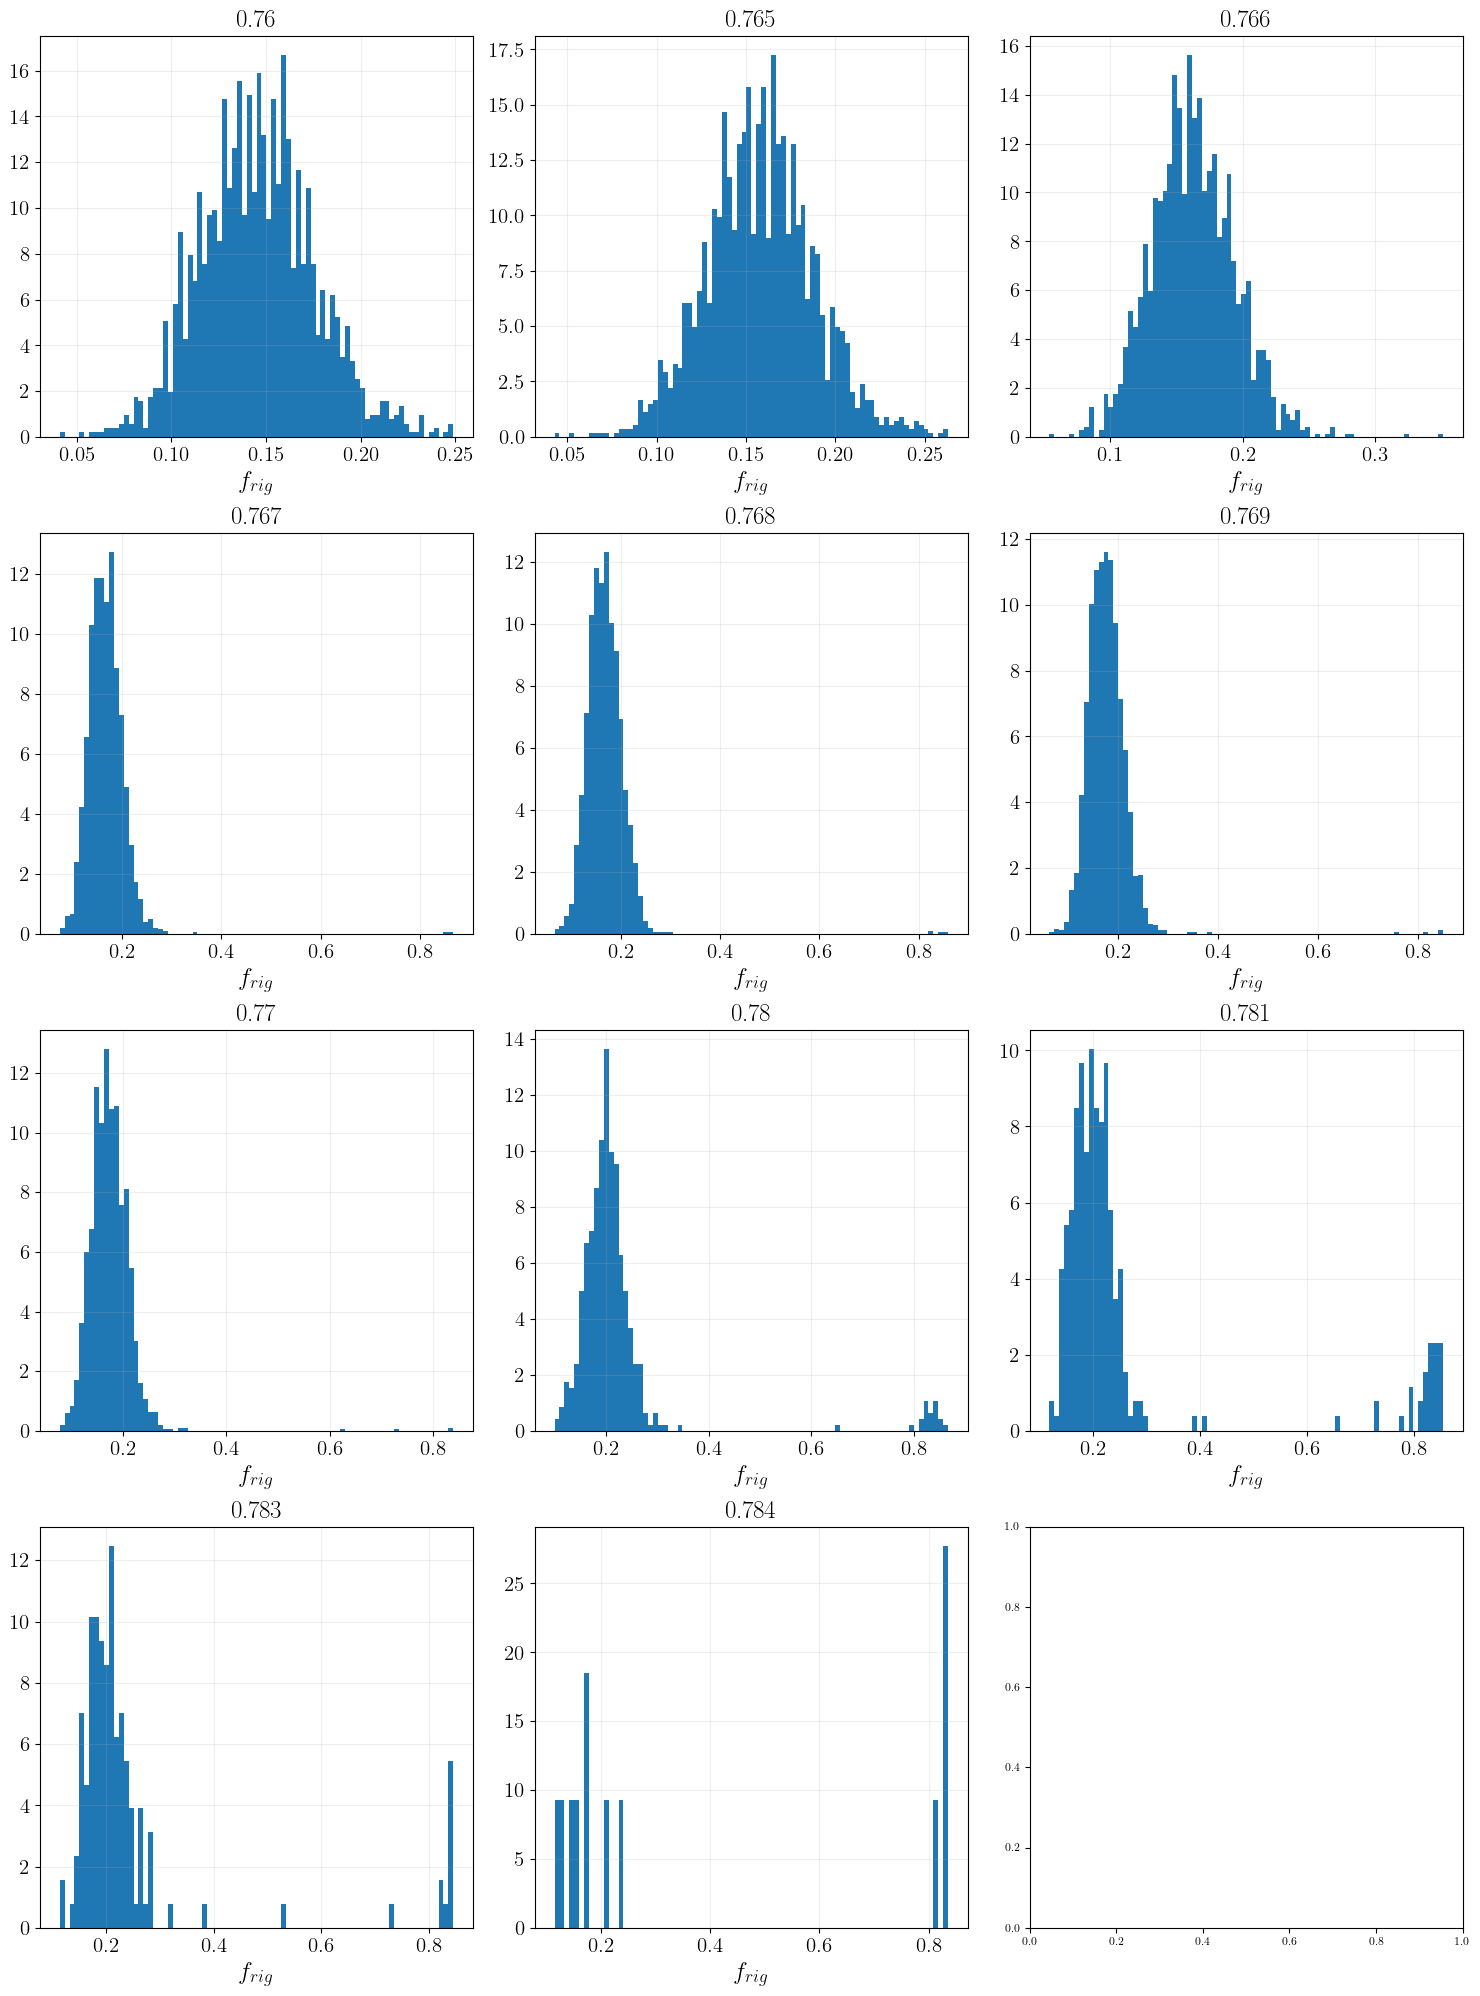

In [7]:
# f_rig histograms

TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)
#TopDir      = "/Volumes/Rahul_2TB/high_bidispersity/"

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.76, 0.765, 0.766, 0.767, 0.768, 0.769, 0.77, 0.78, 0.781, 0.783, 0.784]

ar          = [1.4]

off =20

rigFile = 'F_rig.txt'
cols = 3
rows = math.ceil(len(phi)/3)
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname=TopDir+'NP_'+str(NP[i])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[i]]):
                    with open(f'{dataname}/run_{l+1}/{rigFile}', 'r') as file:
                        rigList = np.loadtxt(file)
                    counts, bin_edges = np.histogram(rigList[off:]/1000, bins=80, density=True)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                    
                    ax = axes[j // cols, j % cols]
                    ax.grid(which = 'Both', alpha = 0.2)
                    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0])
                    ax.set_title(f'{phir}', fontsize = 18, fontweight='bold')
                    ax.set_xlabel(r'$f_{rig}$', fontsize = 18)
                    ax.tick_params(axis='both', which='major', labelsize=15)
                    #ax.set_ylabel('Density')
plt.show()

/tmp/ipykernel_778144/461735852.py:41: RuntimeWarning: divide by zero encountered in log
  ax.bar(bin_centers, np.log((counts)), width=bin_edges[1] - bin_edges[0])


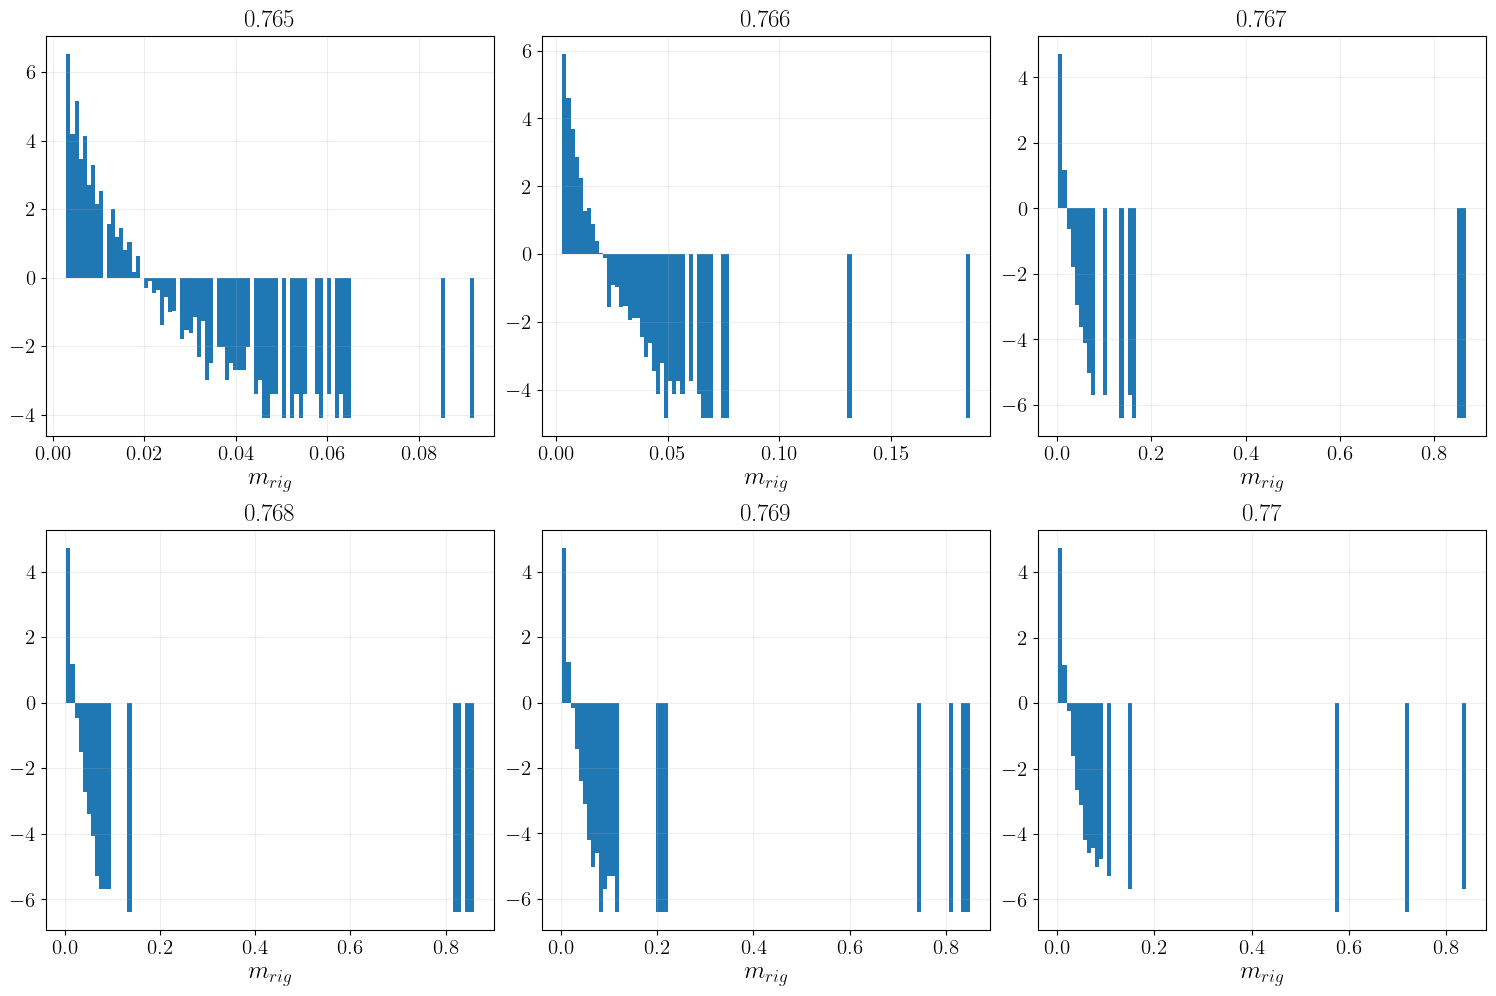

In [181]:
# histogram for m_rig (size of each cluster in al the frames)

TopDir      = "/media/rahul/Rahul_2TB/high_bidispersity/" #(samsung ssd)

NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.765, 0.766, 0.767, 0.768, 0.769, 0.77]

ar          = [1.4]

rigDatFile = 'rig_random_seed_params_stress100r_shear.dat'
cols = 3
rows = math.ceil(len(phi)/3)
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
for i in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname = TopDir + 'NP_' + str(NP[i]) + '/phi_' + phir + '/ar_' + str(ar[k]) + '/Vr_0.5'
            #if os.path.exists(dataname):
            for l in range (run[NP[i]]):
                with open(f'{dataname}/run_{l+1}/{rigDatFile}', 'r') as file:
                    temp = []
                    fileLines = file.readlines()[101:]
                    for line in fileLines:
                        try:
                            if not line.split()[0][0] == '#':
                                lineList = [float(value) for value in line.split()]
                                temp.append(lineList)
                            else:
                                break
                        except IndexError:
                            break
                    rigSize = [i/1000 for sub in temp for i in sub]

                    counts, bin_edges = np.histogram(rigSize, bins=100, density=True)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

                    ax = axes[j // cols, j % cols]
                    ax.grid(which = 'Both', alpha = 0.2)
                    ax.bar(bin_centers, np.log((counts)), width=bin_edges[1] - bin_edges[0])
                    ax.set_title(f'{phir}', fontsize = 18, fontweight='bold')
                    ax.set_xlabel(r'$m_{rig}$', fontsize = 18)
                    ax.tick_params(axis='both', which='major', labelsize=15)
                    #ax.set_ylabel('Density')
plt.show()

In [50]:
phim_= [0.765,0.765,0.765,0.775,0.793]
phim= [0.7839319624121466, 0.7833175449290914, 0.7854135255337176, 0.7884149255295934, 0.818194260082243]

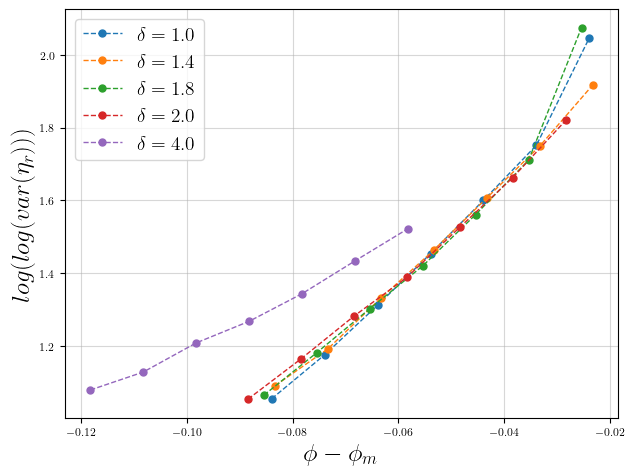

In [63]:
## plot for var(eta) vs phi - phim
phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76]

for k in range(len(ar)):
    varList = []
    for j in range(len(phi)):
        phii = phi[j]
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        temp =[]
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(ar[k])
        if filename in std_dev_dict:
            varList.append(std_dev_dict[filename][3])
            
            
        #varList.append(np.mean(temp))
    plt.plot(list(np.array(phi) - phim[k]), np.log(np.log(list(varList))), '--o', label=r'$\delta = {:.1f}$'.format(ar[k]))
plt.grid(which='Both', alpha=0.5)
plt.xlabel(r'$\phi - \phi_m$', fontsize = 18)
plt.ylabel(r'$log(log(var(\eta_r)))$', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

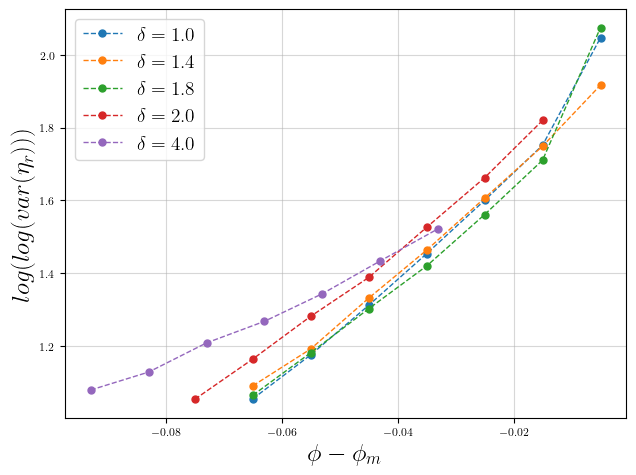

In [64]:
## plot for var(eta) vs phi - phim_
phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76]

for k in range(len(ar)):
    varList = []
    for j in range(len(phi)):
        phii = phi[j]
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        temp =[]
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(ar[k])
        if filename in std_dev_dict:
            varList.append(std_dev_dict[filename][3])
            
            
        #varList.append(np.mean(temp))
    plt.plot(list(np.array(phi) - phim_[k]), np.log(np.log(list(varList))), '--o', label=r'$\delta = {:.1f}$'.format(ar[k]))
plt.grid(which='Both', alpha=0.5)
plt.xlabel(r'$\phi - \phi_m$', fontsize = 18)
plt.ylabel(r'$log(log(var(\eta_r)))$', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

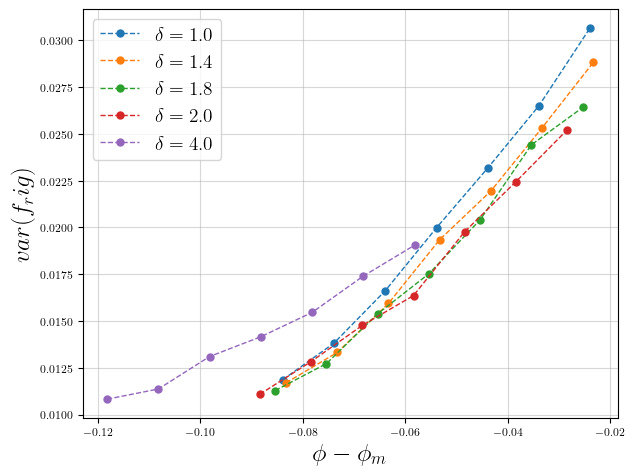

In [46]:
## plot for var(frig) vs phi - phim
phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76]

for k in range(len(ar)):
    varList = []
    for j in range(len(phi)):
        phii = phi[j]
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        temp =[]
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(ar[k])
        if filename in std_dev_dict:
            varList.append(std_dev_dict[filename][30])
            
            
        #varList.append(np.mean(temp))
    plt.plot(list(phi - phim[k]), list(varList), '--o', label=r'$\delta = {:.1f}$'.format(ar[k]))
plt.grid(which='Both', alpha=0.5)
plt.xlabel(r'$\phi - \phi_m$', fontsize = 18)
plt.ylabel(r'$var(f_{rig})$', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

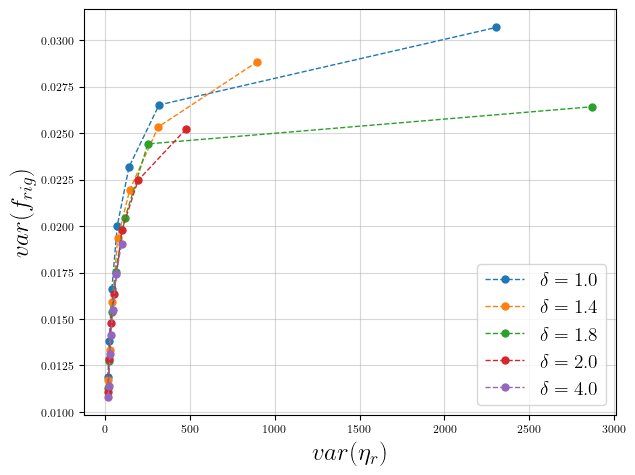

In [49]:
## plot for var(visc) vs var(frig)
phi         = [0.70,0.71,0.72,0.73,0.74,0.75,0.76]

for k in range(len(ar)):
    varList1 = []
    varList2 = []
    for j in range(len(phi)):
        phii = phi[j]
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        temp =[]
        filename='NP_'+str(npp)+'_phi_'+phir+'_ar_'+str(ar[k])
        if filename in std_dev_dict:
            varList1.append(std_dev_dict[filename][3])
            varList2.append(std_dev_dict[filename][30])
            
    plt.plot(varList1, varList2, '--o', label=r'$\delta = {:.1f}$'.format(ar[k]))
plt.grid(which='Both', alpha=0.5)
plt.xlabel(r'$var(\eta_r)$', fontsize = 18)
plt.ylabel(r'$var(f_{rig})$',  fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

In [25]:
len(phi - phim[1])

7

In [11]:
# reading just viscosity

TopDir      = "/Users/rahul/Documents/Simulations/New/run_2/"#local

# files to read
datfile = 'data_random_seed_params_stress100r_shear.dat'
dataname=TopDir+datfile
with open(f'{dataname}', 'r') as file:
    sum_variables = np.loadtxt(file)

In [14]:
np.mean(sum_variables[100:,3]) # 740 np

4653.777157107232

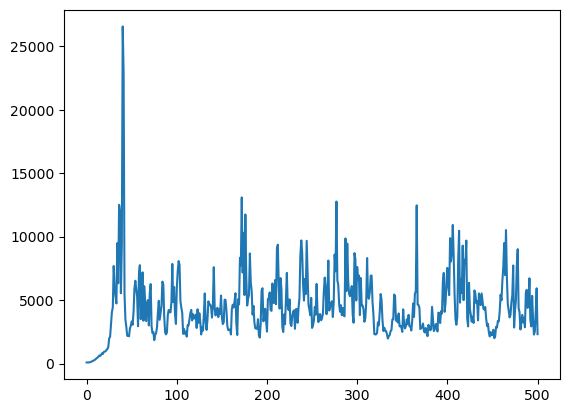

In [12]:
plt.plot(sum_variables[:,3])

In [16]:
# reading just viscosity

TopDir      = "/Volumes/Rahul_2TB/high_bidispersity/NP_500/phi_0.74/ar_4.0/Vr_0.5/" #(samsung ssd)

# files to read
datfile = 'data_random_seed_params_stress100r_shear.dat'

temp=[]

for l in range(8):
    dataname=TopDir+'run_'+str(l+1)+'/'+datfile
    with open(f'{dataname}', 'r') as file:
        sum_variables = np.loadtxt(file)
    temp.append(np.mean(sum_variables[100:,3]))

In [8]:
np.mean(temp)

228.01556228320752

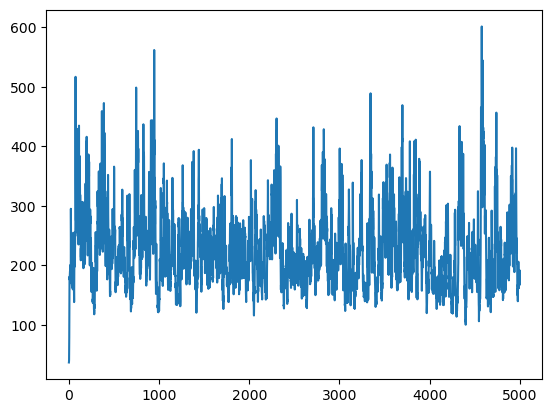

In [17]:
plt.plot(sum_variables[:,3])